# Data Analysis Workflow

- Load Data
- Data cleaning and formatting
- Exploratory data analysis 
- Feature engineering and selection
- Compare several classification models
- Interpret the final model results and find the important features
- Draw conclusions 


In [198]:
import numpy as np
import pandas as pd
import re
import glob
import os
import sys
from TexSoup import TexSoup
import math
from collections import Counter
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [193]:
meta_data = pd.read_csv("meta_data_new.csv") 

# 1- Data cleaning and feature extraction

In [197]:
meta_data.columns

Index(['entry_id', 'updated', 'published', 'title', 'authors', 'summary',
       'comment', 'journal_ref', 'doi', 'primary_category', 'categories',
       'links', 'pdf_url', '_raw', 'download_id', 'download', 'conference',
       'uncommented_data'],
      dtype='object')

## Accessing all papers

In [195]:
def find_list_tex(path):
    l=[]
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".tex"):
                 m=os.path.join(root , file).replace("\\","/")
                 l.append(m)
    return l

def find_main_tex(l):   
    for i in range(len(l)) :
        data = open(l[i], errors="ignore").read()
        if "\documentclass" in data:
            main_index=i
    file = l[main_index] 
    return(main_index)

def soupify(file):
    if ".tex" not in file:
        if "." not in file:
            file=file+".tex"
    if path not in file: 
        file= path +"/" +file 

    soup=''
    with open( file, 'r', errors="ignore") as file_to_read:
        content = file_to_read.read()
        try:
            soup = TexSoup(content)    
        except TypeError:
            soup=content
        pass
    return soup

def flatten(soup):
    while soup.input:
        soup.input.replace(soupify(soup.input.args[0]))
    return soup

def create_full_tex(path):
    l=find_list_tex(path)
    main_index=find_main_tex(l)
    file = l[main_index]
    expanded_tex = flatten(soupify(file))
    output_file= path+"/"+ 'output0.tex'
    with open(output_file, 'w') as output:
        output.write(repr(expanded_tex))
    return(expanded_tex)


In [196]:
def easy_function(paper,data,conferences_df):
    print('paper detected ...')
    # delete commented  data
    commented_data=re.findall(r'%(.*?)\n', data, re.S)
    uncommented_data=data
    for comment in commented_data:
        uncommented_data= uncommented_data.replace('%'+comment+'\n',"")      
    meta_data.loc[meta_data['download_id']==paper,'uncommented_data'] = uncommented_data 
    
    return meta_data

In [8]:
path_to_conferences = "./unzipped_papers_new"
conferences = os.listdir(path_to_conferences)

if '.DS_Store' in conferences:
    conferences.remove('.DS_Store') #added this code to this script because mac sometimes randomly creates .DSStore files

In [9]:
for conference in conferences:
    print(conference)
    path_to_each_conferences=path_to_conferences+"/"+conference
    papers = os.listdir(path_to_each_conferences)
    for paper in papers:
        print('=========================================')
        path_to_each_conference_paper=path_to_each_conferences+"/"+paper
        number_of_tex_files=0
        no_tex_file = True
        
        for root, dirs, files in os.walk(path_to_each_conference_paper):
            for file in files:
                if file.endswith(".tex"):
                    path_to_each_conference_paper_file=os.path.join(root , file).replace("\\","/")
                    no_tex_file=False
                    number_of_tex_files+=1
                    
                    try:
                        data = open(path_to_each_conference_paper_file,encoding="utf8").read()
                    except UnicodeDecodeError:
                        data = open(path_to_each_conference_paper_file, errors="ignore").read()
                    pass
                
                    if "\documentclass" in data:
                            main_tex_file=data
                
        if no_tex_file == True:
            print("pdf", number_of_tex_files , "tex files")                   
                    
        if number_of_tex_files==1:
            print("---------------1 tex file ---------------------------")  
            meta_data=easy_function(paper,data,meta_data)           
                
        elif number_of_tex_files>1:           
            path=path_to_each_conference_paper
            output0=path+"/output0.tex"
            if not os.path.exists(output0):
                print("---------------more than 1 tex file ----------------")
        
                try:
                    print('    Try      ')
                    final_tex_file=create_full_tex(path)  
                except:
                        print('!!!!!!!!!!  Error  !!!!!!!!!!')
                        final_tex_file= main_tex_file
                pass
                meta_data=easy_function(paper,str(final_tex_file),meta_data)               
    

ECAI
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
pdf 0 tex files
---------------1 tex file ---------------------------
paper detected ...
pdf 0 tex files
---------------1 tex file ---------------------------
paper detected ...
pdf 0 tex files
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
pdf 0 tex files
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---

paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
!!!!!!!!!!  Error  !!!!!!!!!!
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------more than 1 tex file ----------------
    Try      
!!!!!!!!!!  Error  !!!!!!!!!!
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper d

paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------1 tex file ---------------------------
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...
---------------more than 1 tex file ----------------
    Try      
paper detected ...


In [7]:
meta_data.columns

Index(['entry_id', 'updated', 'published', 'title', 'authors', 'summary',
       'comment', 'journal_ref', 'doi', 'primary_category', 'categories',
       'links', 'pdf_url', '_raw', 'download_id', 'download', 'conference',
       'uncommented_data'],
      dtype='object')

In [11]:
meta_data.to_csv(r'meta_data_new.csv', index = False)

#### descriptive_ds

In [8]:
descriptive_ds=meta_data[['download_id','conference','title', 'authors', 'summary','primary_category',
                          'uncommented_data']].copy()

In [9]:
descriptive_ds.head()

download_id conference                                              title  \
0   0907.0809v1       ICML  Learning as Search Optimization: Approximate L...   
1   1305.1704v1       ICML                      The Extended Parameter Filter   
2  1602.01783v2       ICML  Asynchronous Methods for Deep Reinforcement Le...   
3  1603.03629v2       ICML  Square Root Graphical Models: Multivariate Gen...   
4  1609.00288v2       ICML  A Unified View of Multi-Label Performance Meas...   

                                             authors  \
0  [arxiv.Result.Author('Hal Daumé III'), arxiv.R...   
1  [arxiv.Result.Author('Yusuf Erol'), arxiv.Resu...   
2  [arxiv.Result.Author('Volodymyr Mnih'), arxiv....   
3  [arxiv.Result.Author('David I. Inouye'), arxiv...   
4  [arxiv.Result.Author('Xi-Zhu Wu'), arxiv.Resul...   

                                             summary primary_category  \
0  Mappings to structured output spaces (strings,...            cs.LG   
1  The parameters of temporal models, such as dyn...          stat.ML   
2  We propose a conceptually simple and lightweig...            cs.LG   
3  We develop Square Root Graphical Models (SQR),...          stat.ML   
4  Multi-label classification deals with the prob...            cs.LG   

                                    uncommented_data  
0  \documentclass{article}\n\usepackage[accepted]...  
1  \n\documentclass{article}\n\n\usepackage[tight...  
2  \documentclass{article} \usepackage{times}\n\u...  
3  \documentclass{article}\n\pdfoutput=1\n\usepac...  
4  \pdfoutput=1\n\documentclass{article}\n\n\n\us...

#### Checking for null values in the uncommented_data

In [10]:
descriptive_ds['uncommented_data'].isnull().sum()

8

#### Isolating and inspecting these values

In [11]:
null_data = descriptive_ds[descriptive_ds.isnull().any(axis=1)]

In [12]:
null_data

download_id conference  \
37   1504.00854v1       ECAI   
76   1805.10421v2      IJCAI   
80    1308.4526v5       ECAI   
90   1911.12899v1  ECML PKDD   
97   2007.00480v1  ECML PKDD   
131   1002.0573v1       ECAI   
136  1801.05459v1       ECAI   
139  1909.02815v1       ECAI   

                                                 title  \
37           Evaluation Evaluation a Monte Carlo study   
76   Enhanced-alignment Measure for Binary Foregrou...   
80   Formalization, Mechanization and Automation of...   
90   Communication-Efficient Distributed Online Lea...   
97   Computational Model for Urban Growth Using Soc...   
131  Medium Access Control for Wireless Sensor Netw...   
136  Considerations regarding security issues impac...   
139  IoT Forensic -- A digital investigation framew...   

                                               authors  \
37         [arxiv.Result.Author('David M. W. Powers')]   
76   [arxiv.Result.Author('Deng-Ping Fan'), arxiv.R...   
80   [arxiv.Result.Author('Christoph Benzmüller'), ...   
90   [arxiv.Result.Author('Michael Kamp'), arxiv.Re...   
97   [arxiv.Result.Author('Piyush Yadav'), arxiv.Re...   
131  [arxiv.Result.Author('Abdoulaye Berthe'), arxi...   
136  [arxiv.Result.Author('Emil Pricop'), arxiv.Res...   
139  [arxiv.Result.Author('Snehal Sathwara'), arxiv...   

                                               summary primary_category  \
37   Over the last decade there has been increasing...            cs.AI   
76   The existing binary foreground map (FM) measur...            cs.CV   
80   G\"odel's ontological proof has been analysed ...            cs.LO   
90   We propose an efficient distributed online lea...            cs.LG   
97   Land use land cover changes (LULCC) are genera...          stat.AP   
131  This paper describes a detailed performance ev...            cs.NI   
136  Control systems behavior can be analyzed takin...            cs.CR   
139  Security issues, threats, and attacks in relat...            cs.NI   

    uncommented_data  
37               NaN  
76               NaN  
80               NaN  
90               NaN  
97               NaN  
131              NaN  
136              NaN  
139              NaN

#### Removing all papers for which uncommented data is empty

In [13]:
descriptive_ds = descriptive_ds.dropna() 

##### Normal data distribution

In [14]:
meta_data['conference'].value_counts()

ICLR         30
ECAI         30
ICML         30
ECML PKDD    30
IJCAI        30
Name: conference, dtype: int64

##### Data distribution after cleaning

In [15]:
descriptive_ds['conference'].value_counts()

ICLR         30
ICML         30
IJCAI        29
ECML PKDD    28
ECAI         25
Name: conference, dtype: int64

In [16]:
descriptive_ds.head()

download_id conference                                              title  \
0   0907.0809v1       ICML  Learning as Search Optimization: Approximate L...   
1   1305.1704v1       ICML                      The Extended Parameter Filter   
2  1602.01783v2       ICML  Asynchronous Methods for Deep Reinforcement Le...   
3  1603.03629v2       ICML  Square Root Graphical Models: Multivariate Gen...   
4  1609.00288v2       ICML  A Unified View of Multi-Label Performance Meas...   

                                             authors  \
0  [arxiv.Result.Author('Hal Daumé III'), arxiv.R...   
1  [arxiv.Result.Author('Yusuf Erol'), arxiv.Resu...   
2  [arxiv.Result.Author('Volodymyr Mnih'), arxiv....   
3  [arxiv.Result.Author('David I. Inouye'), arxiv...   
4  [arxiv.Result.Author('Xi-Zhu Wu'), arxiv.Resul...   

                                             summary primary_category  \
0  Mappings to structured output spaces (strings,...            cs.LG   
1  The parameters of temporal models, such as dyn...          stat.ML   
2  We propose a conceptually simple and lightweig...            cs.LG   
3  We develop Square Root Graphical Models (SQR),...          stat.ML   
4  Multi-label classification deals with the prob...            cs.LG   

                                    uncommented_data  
0  \documentclass{article}\n\usepackage[accepted]...  
1  \n\documentclass{article}\n\n\usepackage[tight...  
2  \documentclass{article} \usepackage{times}\n\u...  
3  \documentclass{article}\n\pdfoutput=1\n\usepac...  
4  \pdfoutput=1\n\documentclass{article}\n\n\n\us...

In [17]:
descriptive_ds['primary_category'].value_counts()

cs.LG              60
stat.ML            22
cs.AI              15
cs.CL              13
cs.CV              11
cs.SI               3
cs.IR               3
cs.CR               3
quant-ph            2
cs.NE               2
stat.CO             1
cs.SD               1
cond-mat.dis-nn     1
stat.AP             1
math.OC             1
cs.DB               1
cs.DL               1
eess.IV             1
Name: primary_category, dtype: int64

## Feature extraction using Reges

In [18]:
#abstract
descriptive_ds = descriptive_ds.rename(columns={'summary': 'abstract'})
descriptive_ds['number_of_words_abstract'] = descriptive_ds['abstract'].str.len()

#authors
descriptive_ds['authors']=descriptive_ds['authors'].str.split(',')
descriptive_ds['Authors_number']=descriptive_ds['authors'].str.len()

#title len
descriptive_ds['title_len']=descriptive_ds['title'].str.len()

#sections
descriptive_ds['sections']=[re.findall(r'\\section{.*?}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['num_of_sections'] = descriptive_ds['sections'].str.len()

#subsections
descriptive_ds['subsections']=[re.findall(r'..\\subsection{.*?}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_subsections'] = descriptive_ds['subsections'].str.len()

#Tables
descriptive_ds['Tables']=[re.findall(r'begin{table}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_Tables'] = descriptive_ds['Tables'].str.len()

#Figures
descriptive_ds['Figures']=[re.findall(r'begin{figure}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_Figures'] = descriptive_ds['Figures'].str.len()

#caption
descriptive_ds['Captions']=[re.findall(r'\\caption{.*?}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_Captions'] = descriptive_ds['Captions'].str.len()
      
#Citations
descriptive_ds['Citations']=[re.findall(r'\\cite{.*?}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_Citations'] = descriptive_ds['Citations'].str.len()

#Math equations
descriptive_ds['MathEQ']=[re.findall(r'begin{equation}', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_MathEQ'] = descriptive_ds['MathEQ'].str.len()
#number_of_MathEQ=len(re.findall(r'\begin{equation}', uncommented_data, re.S))
    
#Number of algorithms
descriptive_ds['Algo']=[re.findall(r'begin{algorithm', str(x)) for x in descriptive_ds['uncommented_data']] 
descriptive_ds['number_of_Algo'] = descriptive_ds['Algo'].str.len()

# 2- Descriptive analysis 

In [19]:
#Stats to include in paper
avg_len_title=descriptive_ds.groupby('conference', as_index=False)['title_len'].mean()
avg_num_authors=descriptive_ds.groupby('conference', as_index=False)['Authors_number'].mean()
avg_len_abstract = descriptive_ds.groupby('conference', as_index=False)['number_of_words_abstract'].mean()
avg_num_sections = descriptive_ds.groupby('conference', as_index=False)['num_of_sections'].mean()
avg_num_subsections = descriptive_ds.groupby('conference', as_index=False)['number_of_subsections'].mean()
avg_num_tables = descriptive_ds.groupby('conference', as_index=False)['number_of_Tables'].mean()
avg_num_figures = descriptive_ds.groupby('conference', as_index=False)['number_of_Figures'].mean()
avg_num_captions = descriptive_ds.groupby('conference', as_index=False)['number_of_Captions'].mean()
avg_num_citations = descriptive_ds.groupby('conference', as_index=False)['number_of_Citations'].mean()
avg_num_mathEQ = descriptive_ds.groupby('conference', as_index=False)['number_of_MathEQ'].mean()
avg_num_algo = descriptive_ds.groupby('conference', as_index=False)['number_of_Algo'].mean() 

In [20]:
data_frames = [avg_len_title, avg_num_authors, avg_len_abstract, avg_num_sections, avg_num_subsections, avg_num_tables,
         avg_num_figures, avg_num_captions, avg_num_citations, avg_num_mathEQ, avg_num_algo]

In [21]:
from functools import reduce

average_stats_df = reduce(lambda  left,right: pd.merge(left,right,on=['conference'],
                                            how='outer'), data_frames)

In [22]:
average_stats_df

conference  title_len  Authors_number  number_of_words_abstract  \
0       ECAI  63.040000        3.120000               1100.440000   
1  ECML PKDD  66.607143        3.821429               1089.500000   
2       ICLR  67.833333        4.666667               1065.266667   
3       ICML  60.800000        4.333333               1021.433333   
4      IJCAI  62.965517        4.310345                983.206897   

   num_of_sections  number_of_subsections  number_of_Tables  \
0         6.960000               0.200000          2.360000   
1         5.928571               0.321429          1.535714   
2         8.833333               0.600000          4.000000   
3         7.800000               0.500000          1.600000   
4         6.413793               0.137931          2.034483   

   number_of_Figures  number_of_Captions  number_of_Citations  \
0           2.320000            7.400000            34.240000   
1           4.428571            8.250000            29.607143   
2           6.833333           11.800000            15.900000   
3           3.866667           11.066667            20.700000   
4           2.758621            5.413793            32.896552   

   number_of_MathEQ  number_of_Algo  
0          5.520000        0.840000  
1          5.321429        2.321429  
2          9.000000        1.600000  
3          5.833333        1.433333  
4          4.931034        1.034483

In [23]:
descriptive_ds.columns

Index(['download_id', 'conference', 'title', 'authors', 'abstract',
       'primary_category', 'uncommented_data', 'number_of_words_abstract',
       'Authors_number', 'title_len', 'sections', 'num_of_sections',
       'subsections', 'number_of_subsections', 'Tables', 'number_of_Tables',
       'Figures', 'number_of_Figures', 'Captions', 'number_of_Captions',
       'Citations', 'number_of_Citations', 'MathEQ', 'number_of_MathEQ',
       'Algo', 'number_of_Algo'],
      dtype='object')

In [24]:
#Most popular section name
descriptive_ds['sections'] = [re.findall('\{(.*?)\}', str(x)) for x in descriptive_ds['sections']]

# 3- Conferences Individual Analysis

In [25]:
ecai_df = descriptive_ds.loc[descriptive_ds['conference'] == 'ECAI']
ecai_list = ecai_df['sections'].tolist()
ecai_list = [item for sublist in ecai_list for item in sublist]
ecai_list = [ i.upper() for i in ecai_list]
ecai_count = Counter(ecai_list)

iclr_df = descriptive_ds.loc[descriptive_ds['conference'] == 'ICLR']
iclr_list = iclr_df['sections'].tolist()
iclr_list = [item for sublist in iclr_list for item in sublist]
iclr_list = [ i.upper() for i in iclr_list]
iclr_count = Counter(iclr_list)

icml_df = descriptive_ds.loc[descriptive_ds['conference'] == 'ICML']
icml_list = icml_df['sections'].tolist()
icml_list = [item for sublist in icml_list for item in sublist]
icml_list = [ i.upper() for i in icml_list]
icml_count = Counter(icml_list)

ijcai_df = descriptive_ds.loc[descriptive_ds['conference'] == 'IJCAI']
ijcai_list = ijcai_df['sections'].tolist()
ijcai_list = [item for sublist in ijcai_list for item in sublist]
ijcai_list = [ i.upper() for i in ijcai_list]
ijcai_count = Counter(ijcai_list)

ecml_df = descriptive_ds.loc[descriptive_ds['conference'] == 'ECML PKDD']
ecml_list = ecml_df['sections'].tolist()
ecml_list = [item for sublist in ecml_list for item in sublist]
ecml_list = [ i.upper() for i in ecml_list]
ecml_count = Counter(ecml_list)

In [26]:
conf=descriptive_ds[['conference','download_id',"number_of_words_abstract",'num_of_sections',
                'number_of_subsections','number_of_Tables','number_of_Figures','Authors_number']].groupby('conference')
ECAI=conf.get_group('ECAI')
ECAI=ECAI.set_index('download_id')
ICLR=conf.get_group('ICLR')
ICLR=ICLR.set_index('download_id')
ICML=conf.get_group('ICML')
ICML=ICML.set_index('download_id')
IJCAI=conf.get_group('IJCAI')
IJCAI=IJCAI.set_index('download_id')
ECML=conf.get_group('ECML PKDD')
ECML=ECML.set_index('download_id')

## ecai

In [27]:
ecai_count.most_common(3)

[('INTRODUCTION', 24), ('CONCLUSION', 13), ('RELATED WORK', 13)]

(-0.5, 399.5, 199.5, -0.5)

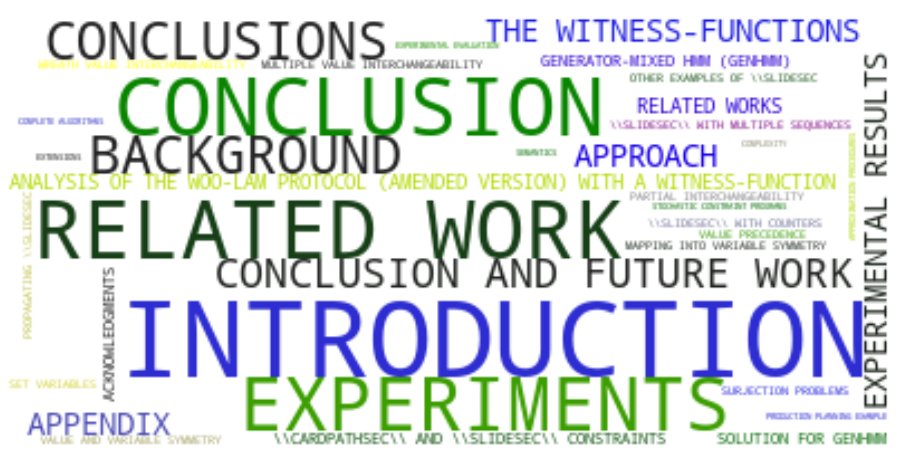

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
colors = ["red", "blue", "yellow", "green", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", colormap=cmap)
wc.generate_from_frequencies(ecai_count)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

<Figure size 432x288 with 0 Axes>

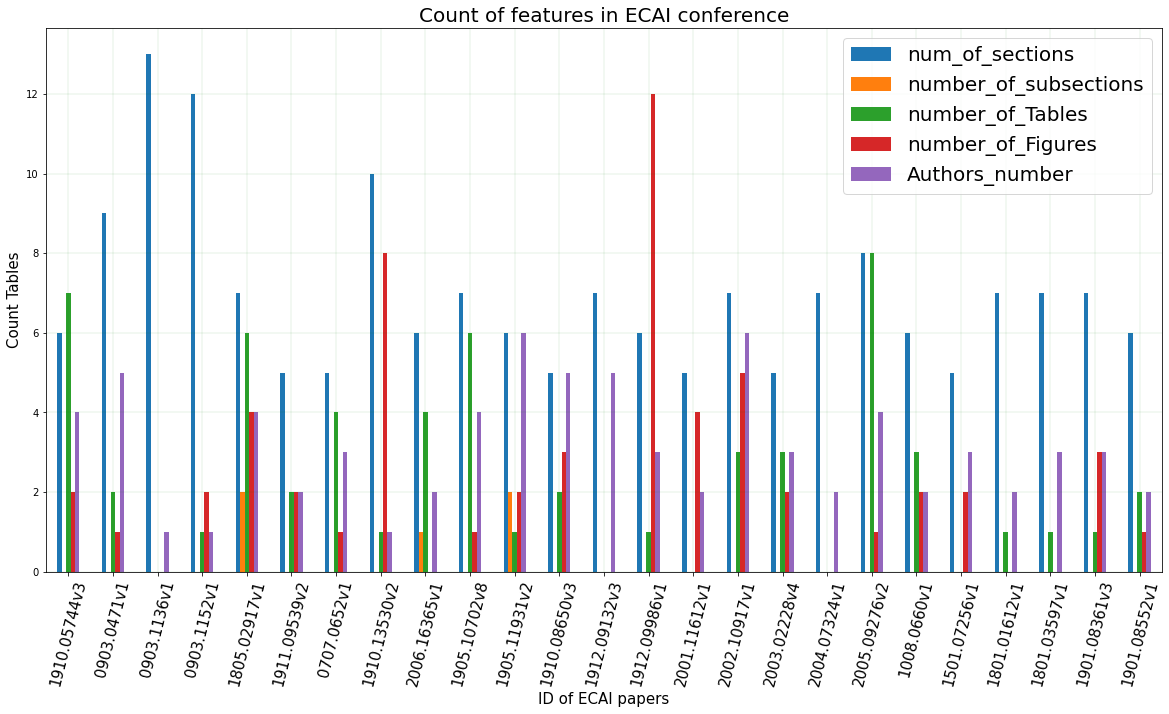

In [29]:
import matplotlib.pyplot as plt
plt.clf()
ECAI[['conference', 'num_of_sections',
       'number_of_subsections', 'number_of_Tables', 'number_of_Figures',
       'Authors_number']].plot(kind='bar',figsize=(20, 10))
plt.ylabel('Count Tables', fontsize=15)
plt.title('Count of features in ECAI conference',fontsize=20)
plt.xlabel('ID of ECAI papers', fontsize=15)
plt.legend(fontsize=20 )
plt.xticks(rotation=76,fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

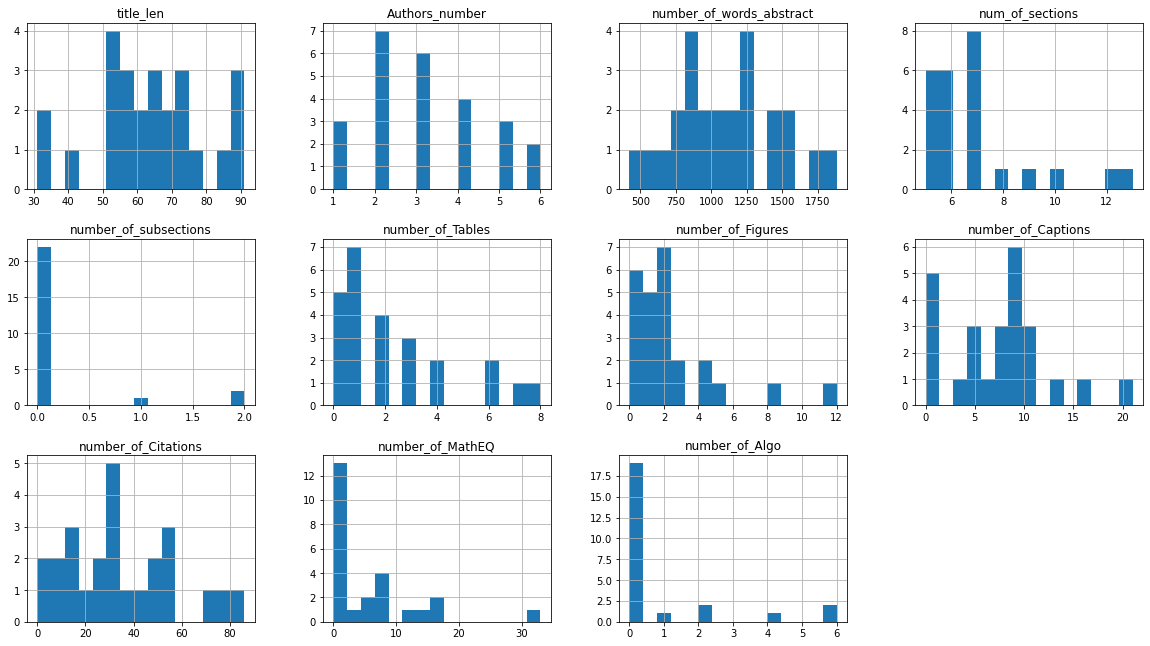

In [30]:
numerical = [  'title_len', 'Authors_number', 'number_of_words_abstract', 'num_of_sections', 'number_of_subsections',
  'number_of_Tables', 'number_of_Figures', 'number_of_Captions', 'number_of_Citations', 'number_of_MathEQ',
  'number_of_Algo'
]
ecai_df[numerical].hist(bins=15, figsize=(20, 15), layout=(4, 4));

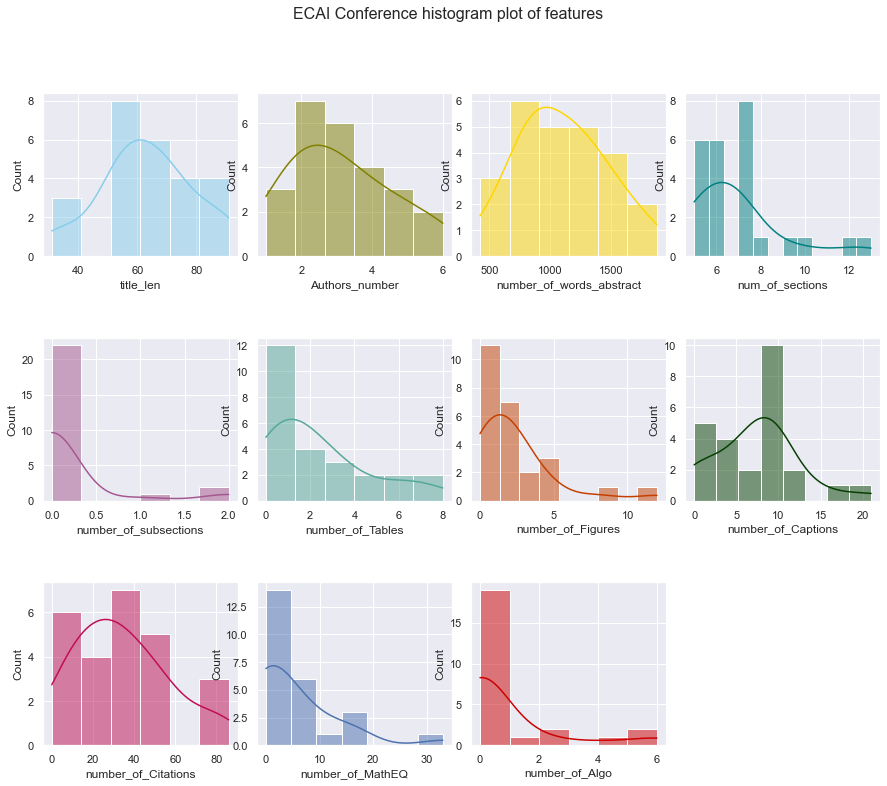

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df = ecai_df[numerical]

fig, axs = plt.subplots(3, 4, figsize=(15, 12))

fig.suptitle("ECAI Conference histogram plot of features", fontsize=16)

sns.histplot(data=df, x="title_len", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Authors_number", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="number_of_words_abstract", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="num_of_sections", kde=True, color="teal", ax=axs[0, 3])

sns.histplot(data=df, x="number_of_subsections", kde=True, color="#a55890", ax=axs[1, 0])
sns.histplot(data=df, x="number_of_Tables", kde=True, color="#55a899", ax=axs[1, 1])
sns.histplot(data=df, x="number_of_Figures", kde=True, color="#c44000", ax=axs[1, 2])
sns.histplot(data=df, x="number_of_Captions", kde=True, color="#044000", ax=axs[1, 3])

sns.histplot(data=df, x="number_of_Citations", kde=True, color="#c00e52", ax=axs[2, 0])
sns.histplot(data=df, x="number_of_MathEQ", kde=True, color="#4c72b0", ax=axs[2, 1])
sns.histplot(data=df, x="number_of_Algo", kde=True, color="#cc0000", ax=axs[2, 2])

fig.delaxes(axs[2][3])

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.1)

plt.show()

# iclr

In [32]:
iclr_count.most_common(3)

[('INTRODUCTION', 26), ('EXPERIMENTS', 17), ('RELATED WORK', 12)]

(-0.5, 399.5, 199.5, -0.5)

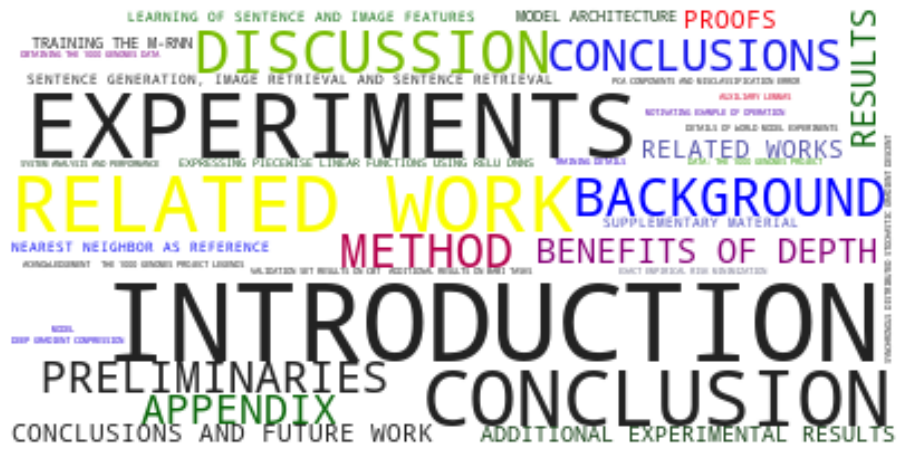

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
colors = ["red", "blue", "yellow", "green", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", colormap=cmap)
wc.generate_from_frequencies(iclr_count)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

<Figure size 432x288 with 0 Axes>

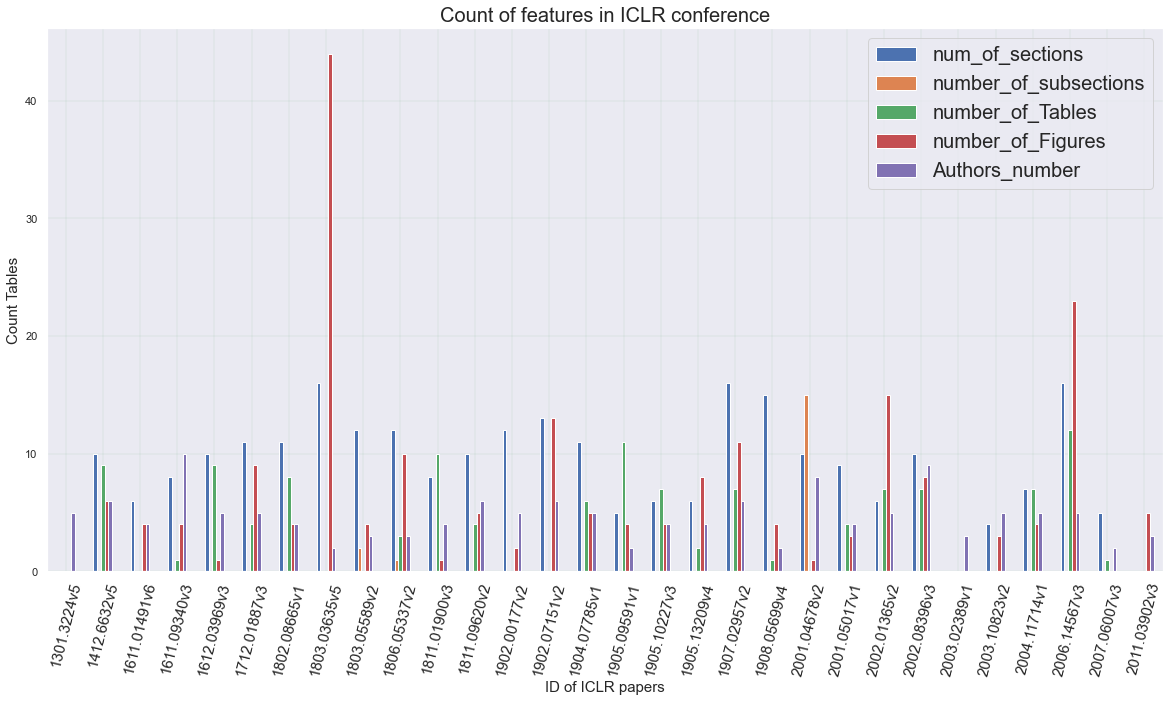

In [56]:
import matplotlib.pyplot as plt
plt.clf()
ICLR[['conference', 'num_of_sections',
       'number_of_subsections', 'number_of_Tables', 'number_of_Figures',
       'Authors_number']].plot(kind='bar',figsize=(20, 10))
plt.ylabel('Count Tables', fontsize=15)
plt.title('Count of features in ICLR conference',fontsize=20)
plt.xlabel('ID of ICLR papers', fontsize=15)
plt.legend(fontsize=20 )
plt.xticks(rotation=76,fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

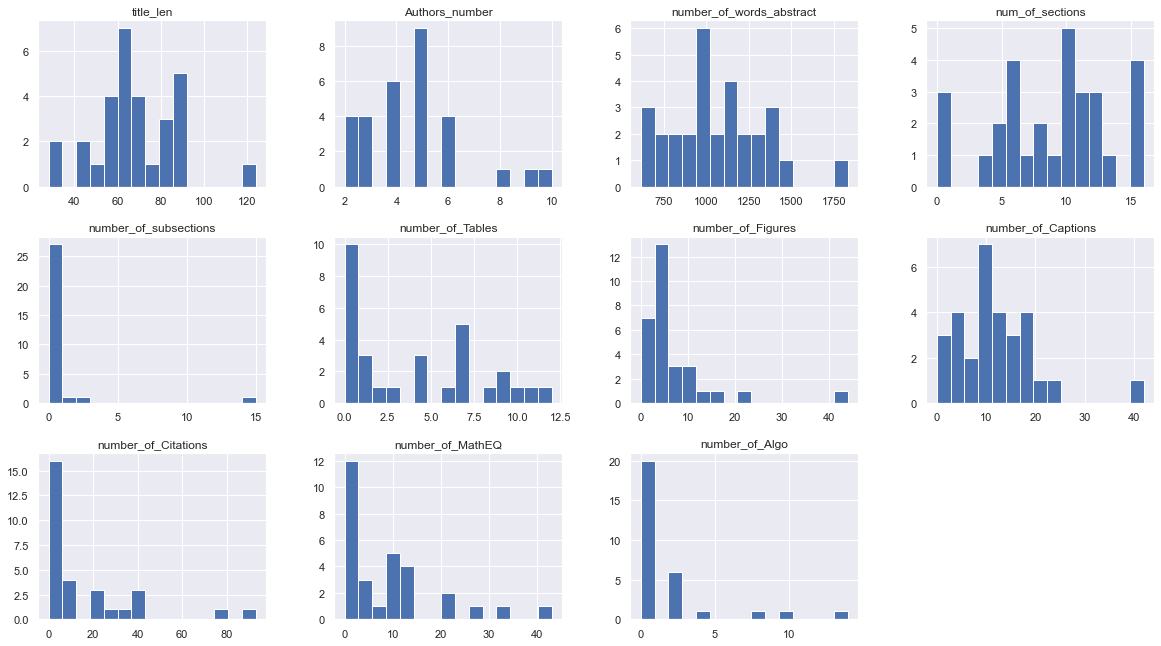

In [35]:
numerical = [  'title_len', 'Authors_number', 'number_of_words_abstract', 'num_of_sections', 'number_of_subsections',
  'number_of_Tables', 'number_of_Figures', 'number_of_Captions', 'number_of_Citations', 'number_of_MathEQ',
  'number_of_Algo'
]
iclr_df[numerical].hist(bins=15, figsize=(20, 15), layout=(4, 4));

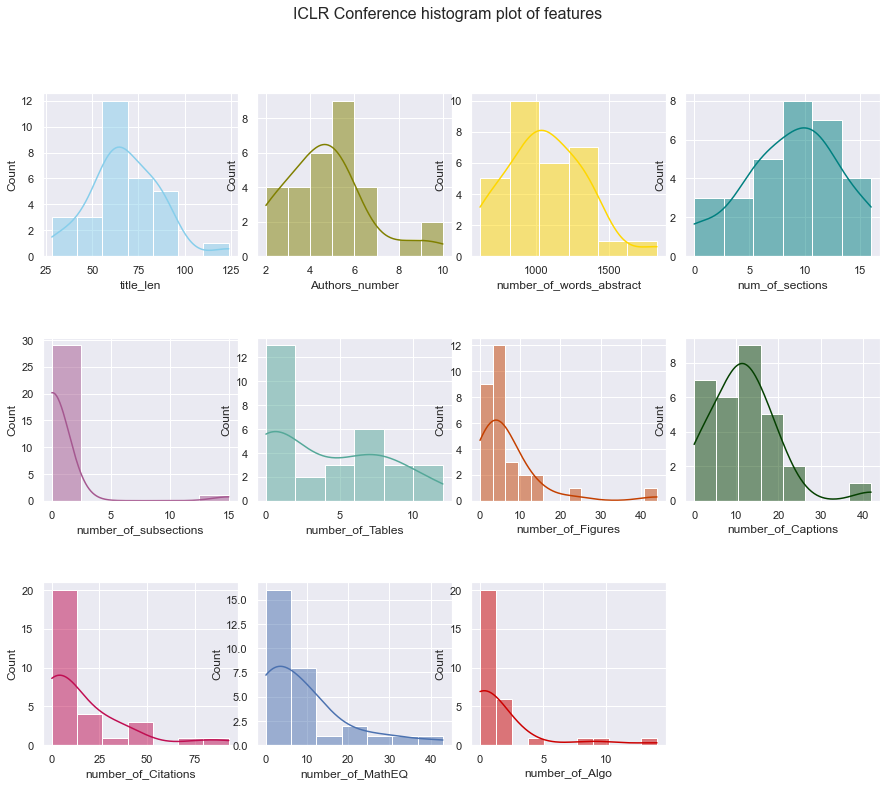

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df = iclr_df[numerical]

fig, axs = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle("ICLR Conference histogram plot of features", fontsize=16)


sns.histplot(data=df, x="title_len", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Authors_number", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="number_of_words_abstract", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="num_of_sections", kde=True, color="teal", ax=axs[0, 3])

sns.histplot(data=df, x="number_of_subsections", kde=True, color="#a55890", ax=axs[1, 0])
sns.histplot(data=df, x="number_of_Tables", kde=True, color="#55a899", ax=axs[1, 1])
sns.histplot(data=df, x="number_of_Figures", kde=True, color="#c44000", ax=axs[1, 2])
sns.histplot(data=df, x="number_of_Captions", kde=True, color="#044000", ax=axs[1, 3])

sns.histplot(data=df, x="number_of_Citations", kde=True, color="#c00e52", ax=axs[2, 0])
sns.histplot(data=df, x="number_of_MathEQ", kde=True, color="#4c72b0", ax=axs[2, 1])
sns.histplot(data=df, x="number_of_Algo", kde=True, color="#cc0000", ax=axs[2, 2])

fig.delaxes(axs[2][3])

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.1)

plt.show()

# icml

In [37]:
icml_count.most_common(3)

[('INTRODUCTION', 24), ('CONCLUSION', 14), ('EXPERIMENTS', 12)]

In [38]:
30/len(icml_list)  * 100.0

12.82051282051282

(-0.5, 399.5, 199.5, -0.5)

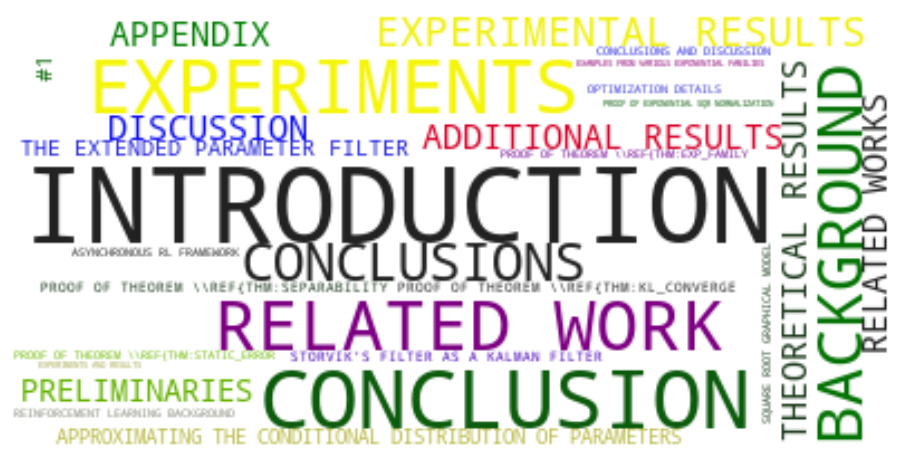

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
colors = ["red", "blue", "yellow", "green", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", colormap=cmap)
wc.generate_from_frequencies(icml_count)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

<Figure size 432x288 with 0 Axes>

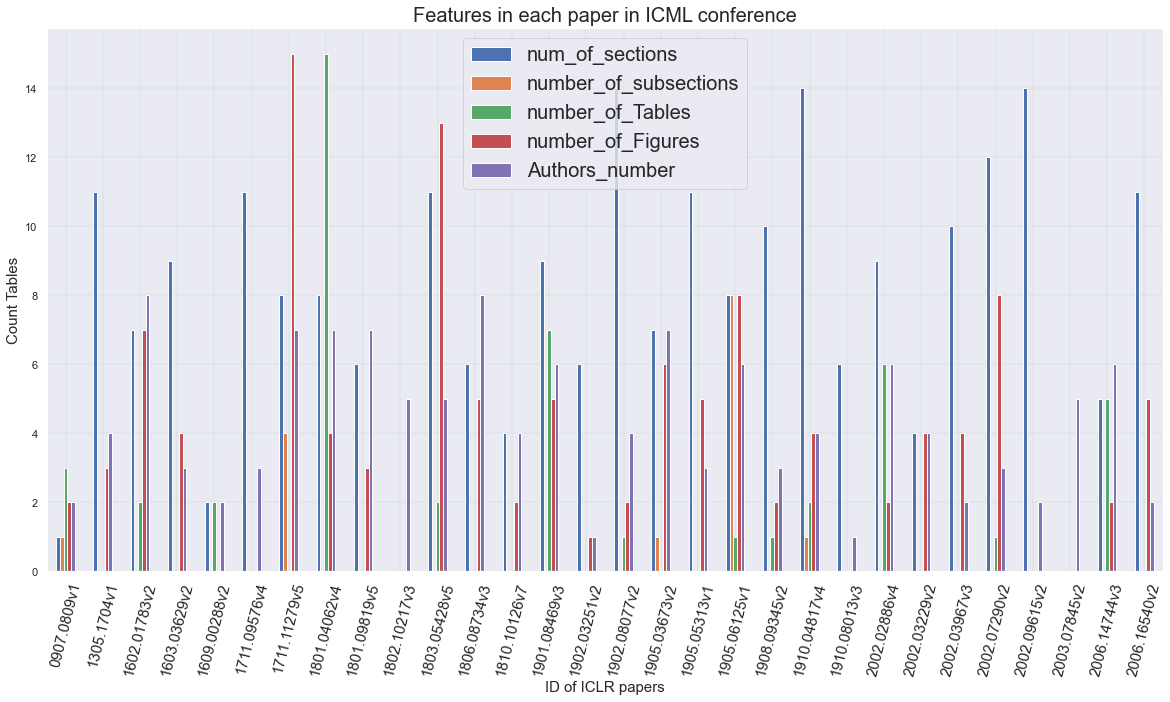

In [40]:
import matplotlib.pyplot as plt
plt.clf()
ICML[['conference', 'num_of_sections',
       'number_of_subsections', 'number_of_Tables', 'number_of_Figures',
       'Authors_number']].plot(kind='bar',figsize=(20, 10))
plt.ylabel('Count Tables', fontsize=15)
plt.title('Features in each paper in ICML conference',fontsize=20)
plt.xlabel('ID of ICLR papers', fontsize=15)
plt.legend(fontsize=20 )
plt.xticks(rotation=76,fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

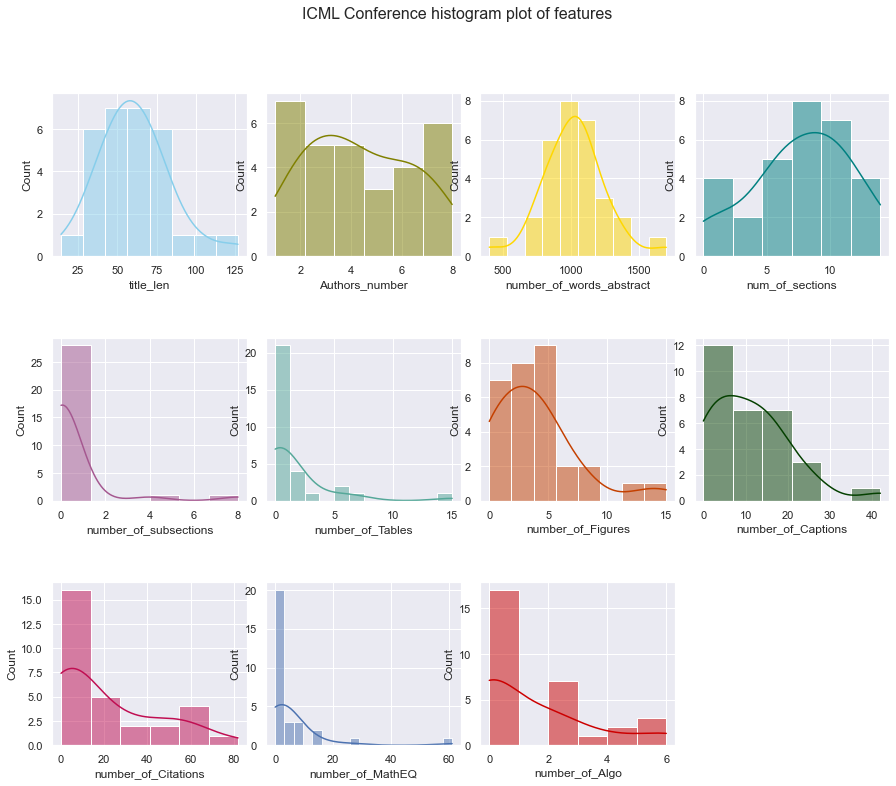

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df = icml_df[numerical]

fig, axs = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle("ICML Conference histogram plot of features", fontsize=16)


sns.histplot(data=df, x="title_len", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Authors_number", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="number_of_words_abstract", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="num_of_sections", kde=True, color="teal", ax=axs[0, 3])

sns.histplot(data=df, x="number_of_subsections", kde=True, color="#a55890", ax=axs[1, 0])
sns.histplot(data=df, x="number_of_Tables", kde=True, color="#55a899", ax=axs[1, 1])
sns.histplot(data=df, x="number_of_Figures", kde=True, color="#c44000", ax=axs[1, 2])
sns.histplot(data=df, x="number_of_Captions", kde=True, color="#044000", ax=axs[1, 3])

sns.histplot(data=df, x="number_of_Citations", kde=True, color="#c00e52", ax=axs[2, 0])
sns.histplot(data=df, x="number_of_MathEQ", kde=True, color="#4c72b0", ax=axs[2, 1])
sns.histplot(data=df, x="number_of_Algo", kde=True, color="#cc0000", ax=axs[2, 2])

fig.delaxes(axs[2][3])

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.1)

plt.show()

# ijcai

In [42]:
ijcai_count.most_common(3)

[('INTRODUCTION', 26), ('RELATED WORK', 13), ('CONCLUSION', 11)]

(-0.5, 399.5, 199.5, -0.5)

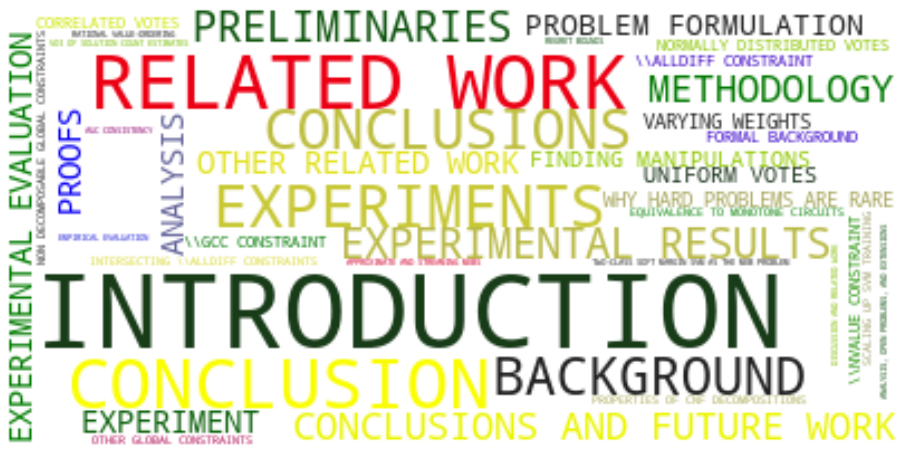

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
colors = ["red", "blue", "yellow", "green", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", colormap=cmap)
wc.generate_from_frequencies(ijcai_count)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

<Figure size 432x288 with 0 Axes>

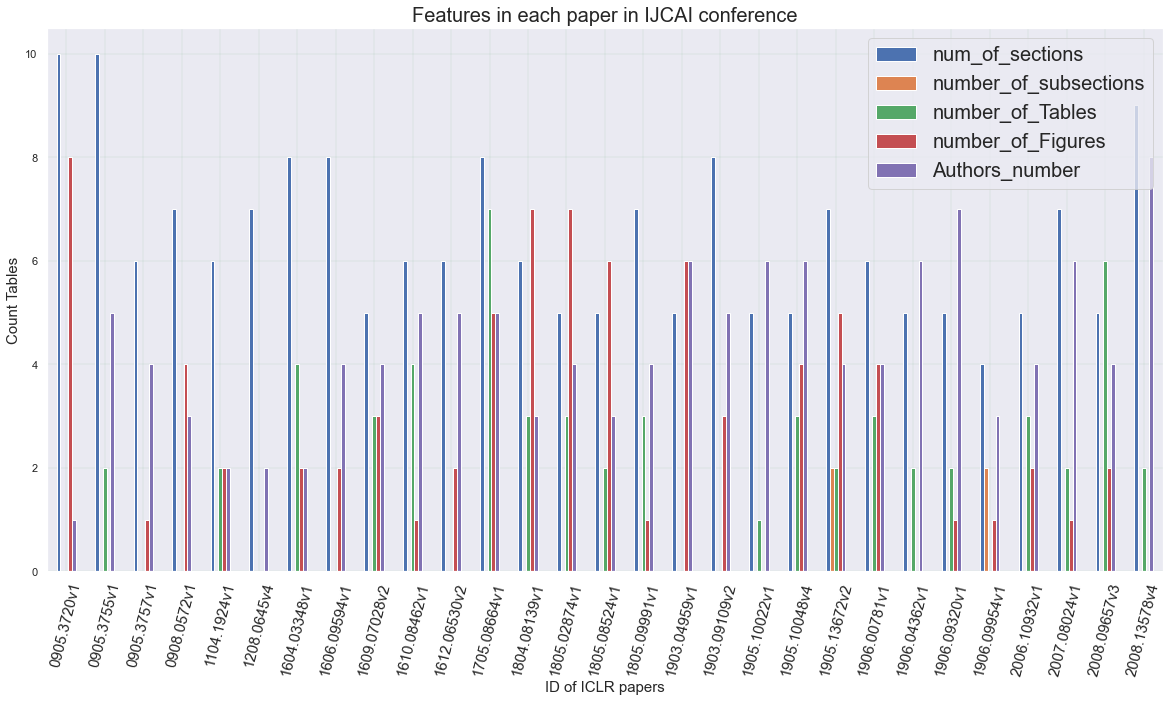

In [44]:
import matplotlib.pyplot as plt
plt.clf()
IJCAI[['conference', 'num_of_sections',
       'number_of_subsections', 'number_of_Tables', 'number_of_Figures',
       'Authors_number']].plot(kind='bar',figsize=(20, 10))
plt.ylabel('Count Tables', fontsize=15)
plt.title('Features in each paper in IJCAI conference',fontsize=20)
plt.xlabel('ID of ICLR papers', fontsize=15)
plt.legend(fontsize=20 )
plt.xticks(rotation=76,fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

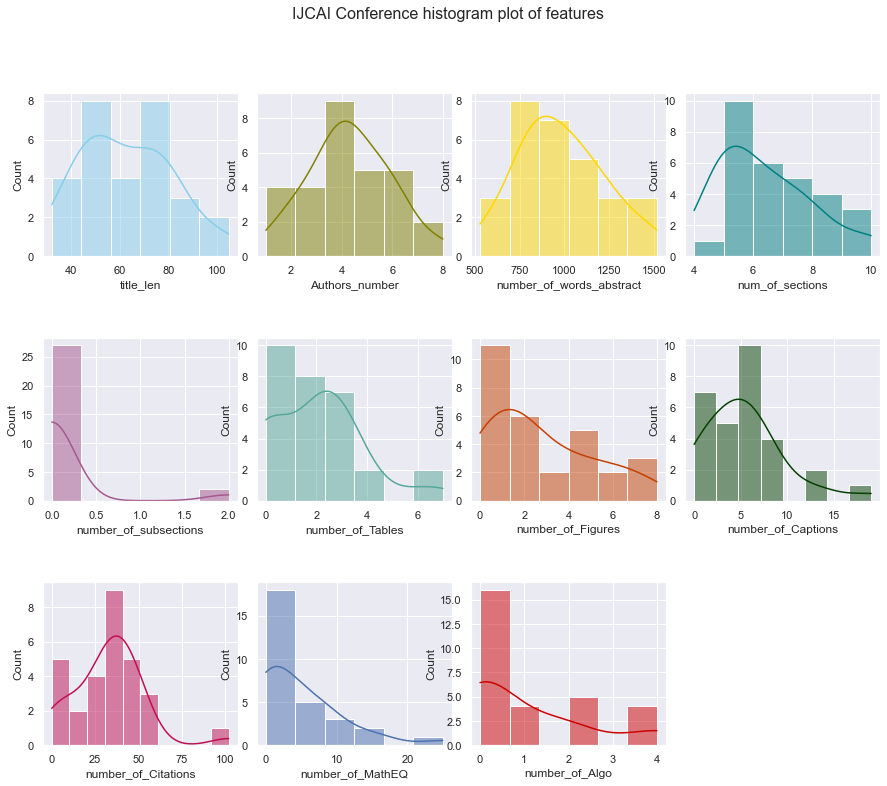

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df = ijcai_df[numerical]

fig, axs = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle("IJCAI Conference histogram plot of features", fontsize=16)


sns.histplot(data=df, x="title_len", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Authors_number", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="number_of_words_abstract", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="num_of_sections", kde=True, color="teal", ax=axs[0, 3])

sns.histplot(data=df, x="number_of_subsections", kde=True, color="#a55890", ax=axs[1, 0])
sns.histplot(data=df, x="number_of_Tables", kde=True, color="#55a899", ax=axs[1, 1])
sns.histplot(data=df, x="number_of_Figures", kde=True, color="#c44000", ax=axs[1, 2])
sns.histplot(data=df, x="number_of_Captions", kde=True, color="#044000", ax=axs[1, 3])

sns.histplot(data=df, x="number_of_Citations", kde=True, color="#c00e52", ax=axs[2, 0])
sns.histplot(data=df, x="number_of_MathEQ", kde=True, color="#4c72b0", ax=axs[2, 1])
sns.histplot(data=df, x="number_of_Algo", kde=True, color="#cc0000", ax=axs[2, 2])

fig.delaxes(axs[2][3])

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.1)

plt.show()

# ecml

In [46]:
ecml_count.most_common(3)

[('INTRODUCTION', 25), ('CONCLUSION', 12), ('RELATED WORK', 11)]

(-0.5, 399.5, 199.5, -0.5)

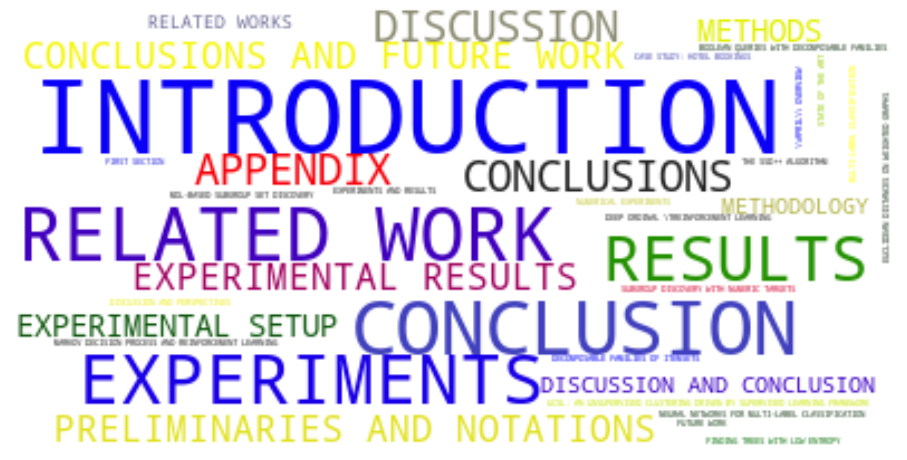

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
colors = ["red", "blue", "yellow", "green", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", colormap=cmap)
wc.generate_from_frequencies(ecml_count)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

<Figure size 432x288 with 0 Axes>

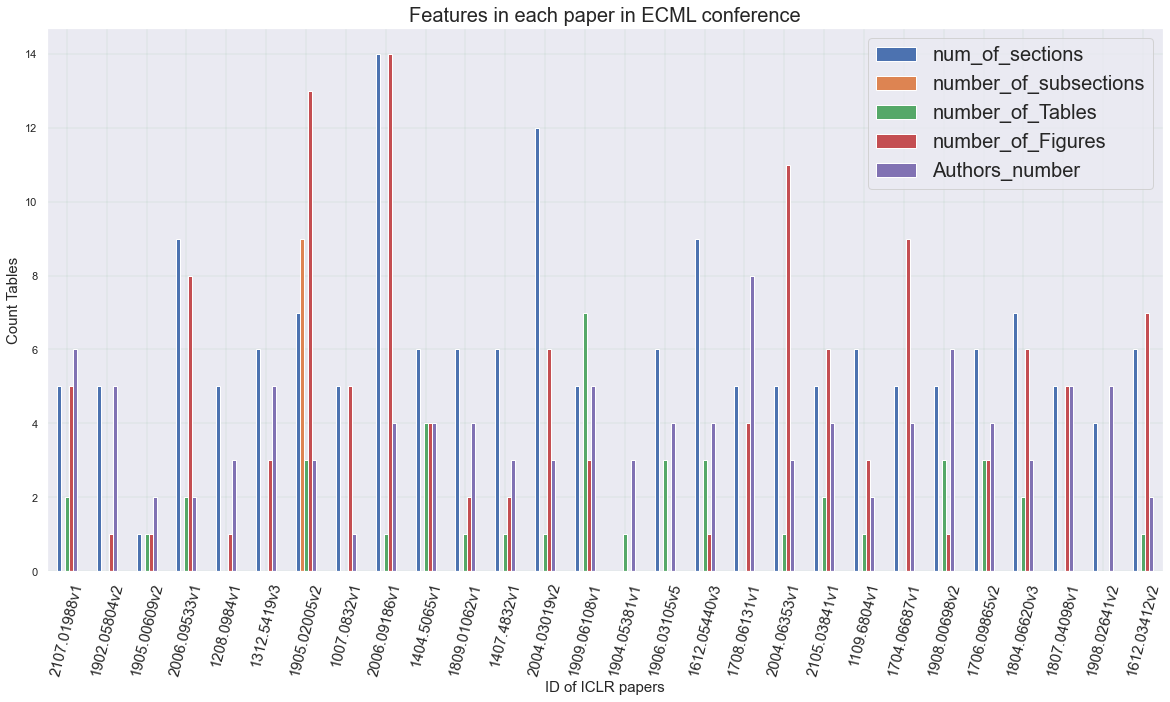

In [48]:
import matplotlib.pyplot as plt
plt.clf()
ECML[['conference', 'num_of_sections',
       'number_of_subsections', 'number_of_Tables', 'number_of_Figures',
       'Authors_number']].plot(kind='bar',figsize=(20, 10))
plt.ylabel('Count Tables', fontsize=15)
plt.title('Features in each paper in ECML conference',fontsize=20)
plt.xlabel('ID of ICLR papers', fontsize=15)
plt.legend(fontsize=20 )
plt.xticks(rotation=76,fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

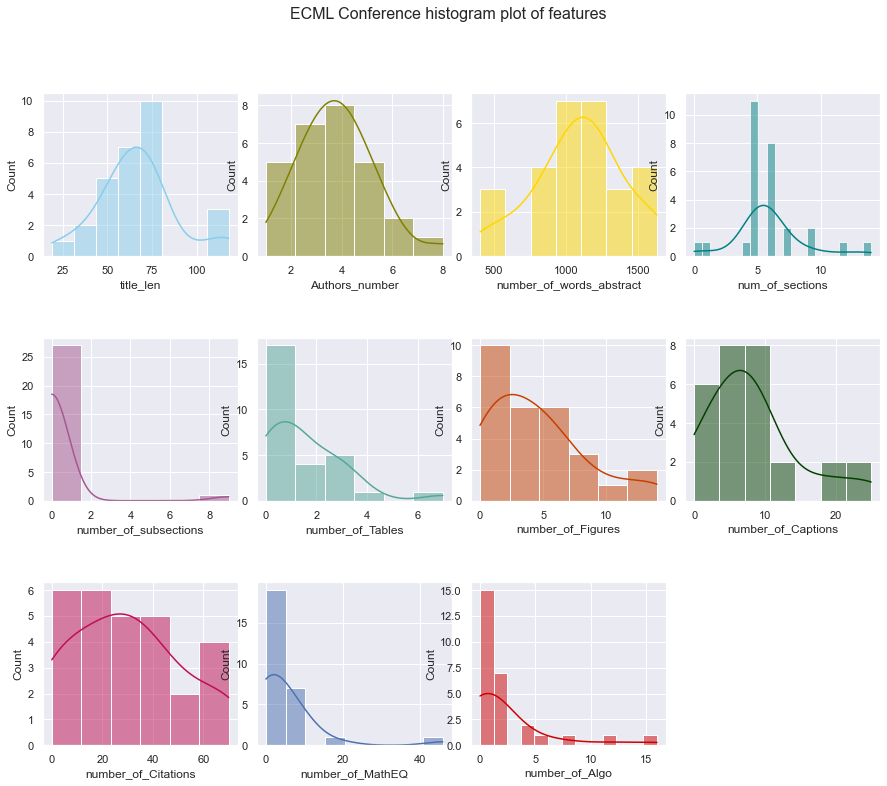

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df = ecml_df[numerical]

fig, axs = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle("ECML Conference histogram plot of features", fontsize=16)


sns.histplot(data=df, x="title_len", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Authors_number", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="number_of_words_abstract", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="num_of_sections", kde=True, color="teal", ax=axs[0, 3])

sns.histplot(data=df, x="number_of_subsections", kde=True, color="#a55890", ax=axs[1, 0])
sns.histplot(data=df, x="number_of_Tables", kde=True, color="#55a899", ax=axs[1, 1])
sns.histplot(data=df, x="number_of_Figures", kde=True, color="#c44000", ax=axs[1, 2])
sns.histplot(data=df, x="number_of_Captions", kde=True, color="#044000", ax=axs[1, 3])

sns.histplot(data=df, x="number_of_Citations", kde=True, color="#c00e52", ax=axs[2, 0])
sns.histplot(data=df, x="number_of_MathEQ", kde=True, color="#4c72b0", ax=axs[2, 1])
sns.histplot(data=df, x="number_of_Algo", kde=True, color="#cc0000", ax=axs[2, 2])

fig.delaxes(axs[2][3])

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.1)

plt.show()

#### Section existance evaluation

In [57]:
descriptive_ds['Introduction']= 0
descriptive_ds['Related Work']= 0
descriptive_ds['Experiments']= 0
descriptive_ds['Conclusion']= 0
descriptive_ds['Acknowledgments']= 0
descriptive_ds['Background']= 0
descriptive_ds['Discussion']= 0

In [ ]:
descriptive_ds['Introduction']= 0
descriptive_ds['Related Work']= 0
descriptive_ds['Experiments']= 0
descriptive_ds['Conclusion']= 0
descriptive_ds['Acknowledgments']= 0
descriptive_ds['Background']= 0
descriptive_ds['Discussion']= 0


for i in range(len(descriptive_ds)):

    if 'Introduction' in descriptive_ds['sections'][i] :
        descriptive_ds['Introduction'][i]=1
    if 'INTRODUCTION' in descriptive_ds['sections'][i] :
        descriptive_ds['Introduction'][i]=1
    if 'Related Work' in descriptive_ds['sections'][i] :
        descriptive_ds['Related Work'][i]=1
    if 'RELATED WORK' in descriptive_ds['sections'][i] :
        descriptive_ds['Related Work'][i]=1
        
    if 'Experiments' in descriptive_ds['sections'][i] :
        descriptive_ds['Experiments'][i]=1
    if 'EXPERIMENTS' in descriptive_ds['sections'][i] :
        descriptive_ds['Experiments'][i]=1
    if 'Conclusion' in descriptive_ds['sections'][i] :
        descriptive_ds['Conclusion'][i]=1
    if 'Conclusions' in descriptive_ds['sections'][i] :
        descriptive_ds['Conclusion'][i]=1
    if 'CONCLUSIONS' in descriptive_ds['sections'][i] :
        descriptive_ds['Conclusion'][i]=1
    if 'CONCLUSION' in descriptive_ds['sections'][i] :
        descriptive_ds['Conclusion'][i]=1
        
    if 'Acknowledgments' in descriptive_ds['sections'][i] :
        descriptive_ds['Acknowledgments'][i]=1
    if 'Acknowledgment' in descriptive_ds['sections'][i] :
        descriptive_ds['Acknowledgments'][i]=1
    if 'ACKNOLEDGMENTS' in descriptive_ds['sections'][i] :
        descriptive_ds['Acknowledgments'][i]=1
        
    if 'BACKGROUND'  in descriptive_ds['sections'][i] :
        descriptive_ds['Background'][i]=1
    if 'Background' in descriptive_ds['sections'][i] :
        descriptive_ds['Background'][i]=1
    if 'Discussion' in descriptive_ds['sections'][i] :
        descriptive_ds['Discussion'][i]=1
    if 'DISCUSSION' in descriptive_ds['sections'][i] :
        descriptive_ds['Discussion'][i]=1
  

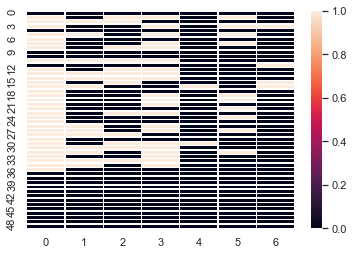

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


M=descriptive_ds[[ 'Authors_number','number_of_words_abstract',  'num_of_sections',
         'number_of_subsections',   'number_of_Tables',
    'number_of_Figures',   'number_of_Captions',
         'number_of_Citations', 'number_of_MathEQ',
       'number_of_Algo','Introduction', 'Related Work', 'Experiments',
       'Conclusion', 'Acknowledgments','Background', 'Discussion']].copy().values
ax = sns.heatmap(M[:50,10:], linewidth=0.4)
plt.show()

In [90]:
descriptive_ds.columns

Index(['download_id', 'conference', 'title', 'authors', 'abstract',
       'primary_category', 'uncommented_data', 'number_of_words_abstract',
       'Authors_number', 'title_len', 'sections', 'num_of_sections',
       'subsections', 'number_of_subsections', 'Tables', 'number_of_Tables',
       'Figures', 'number_of_Figures', 'Captions', 'number_of_Captions',
       'Citations', 'number_of_Citations', 'MathEQ', 'number_of_MathEQ',
       'Algo', 'number_of_Algo', 'Introduction', 'Related Work', 'Experiments',
       'Conclusion', 'Acknowledgments', 'Background', 'Discussion'],
      dtype='object')

# 4- Feature evaluation

In [50]:
#Correlation matrix
descriptive_ds.corr()

number_of_words_abstract  Authors_number  title_len  \
number_of_words_abstract                  1.000000        0.117385   0.172240   
Authors_number                            0.117385        1.000000   0.009764   
title_len                                 0.172240        0.009764   1.000000   
num_of_sections                          -0.059445        0.003992  -0.101329   
number_of_subsections                    -0.152913        0.171220  -0.001621   
number_of_Tables                          0.008677        0.200990  -0.065217   
number_of_Figures                         0.132224        0.036208   0.019944   
number_of_Captions                        0.146982        0.201304  -0.139413   
number_of_Citations                       0.147800        0.100482   0.053019   
number_of_MathEQ                          0.137521        0.076490   0.091936   
number_of_Algo                            0.136345        0.038717  -0.176610   

                          num_of_sections  number_of_subsections  \
number_of_words_abstract        -0.059445              -0.152913   
Authors_number                   0.003992               0.171220   
title_len                       -0.101329              -0.001621   
num_of_sections                  1.000000               0.067497   
number_of_subsections            0.067497               1.000000   
number_of_Tables                 0.152893              -0.079016   
number_of_Figures                0.418166               0.084278   
number_of_Captions               0.346257               0.085224   
number_of_Citations             -0.000440              -0.033318   
number_of_MathEQ                 0.252959               0.245647   
number_of_Algo                   0.190650               0.043670   

                          number_of_Tables  number_of_Figures  \
number_of_words_abstract          0.008677           0.132224   
Authors_number                    0.200990           0.036208   
title_len                        -0.065217           0.019944   
num_of_sections                   0.152893           0.418166   
number_of_subsections            -0.079016           0.084278   
number_of_Tables                  1.000000           0.095455   
number_of_Figures                 0.095455           1.000000   
number_of_Captions                0.391100           0.520336   
number_of_Citations               0.099561          -0.091233   
number_of_MathEQ                  0.064958           0.117870   
number_of_Algo                    0.179171           0.243157   

                          number_of_Captions  number_of_Citations  \
number_of_words_abstract            0.146982             0.147800   
Authors_number                      0.201304             0.100482   
title_len                          -0.139413             0.053019   
num_of_sections                     0.346257            -0.000440   
number_of_subsections               0.085224            -0.033318   
number_of_Tables                    0.391100             0.099561   
number_of_Figures                   0.520336            -0.091233   
number_of_Captions                  1.000000             0.043437   
number_of_Citations                 0.043437             1.000000   
number_of_MathEQ                    0.182057             0.037829   
number_of_Algo                      0.421751             0.009520   

                          number_of_MathEQ  number_of_Algo  
number_of_words_abstract          0.137521        0.136345  
Authors_number                    0.076490        0.038717  
title_len                         0.091936       -0.176610  
num_of_sections                   0.252959        0.190650  
number_of_subsections             0.245647        0.043670  
number_of_Tables                  0.064958        0.179171  
number_of_Figures                 0.117870        0.243157  
number_of_Captions                0.182057        0.421751  
number_of_Citations               0.037829        0.009520  
number_of_MathEQ

In [51]:
descriptive_ds['conference'].unique()

array(['ICML', 'ICLR', 'IJCAI', 'ECAI', 'ECML PKDD'], dtype=object)

#### Bar plots

<Figure size 432x288 with 0 Axes>

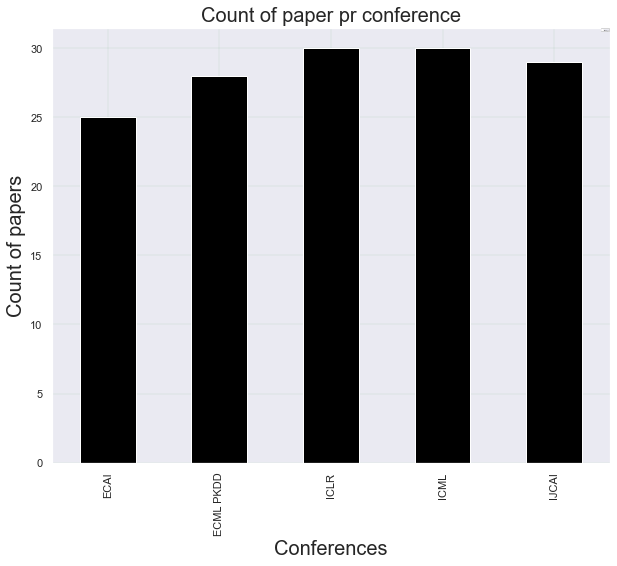

In [52]:
import matplotlib.pyplot as plt
plt.clf()
descriptive_ds[['conference','download_id']].groupby('conference').count().plot(kind='bar',figsize=(10, 8),color='black')
plt.title('Count of paper pr conference',fontsize=20)
plt.ylabel('Count of papers', fontsize=20)
plt.xlabel('Conferences', fontsize=20)
plt.legend(fontsize=0)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

<Figure size 432x288 with 0 Axes>

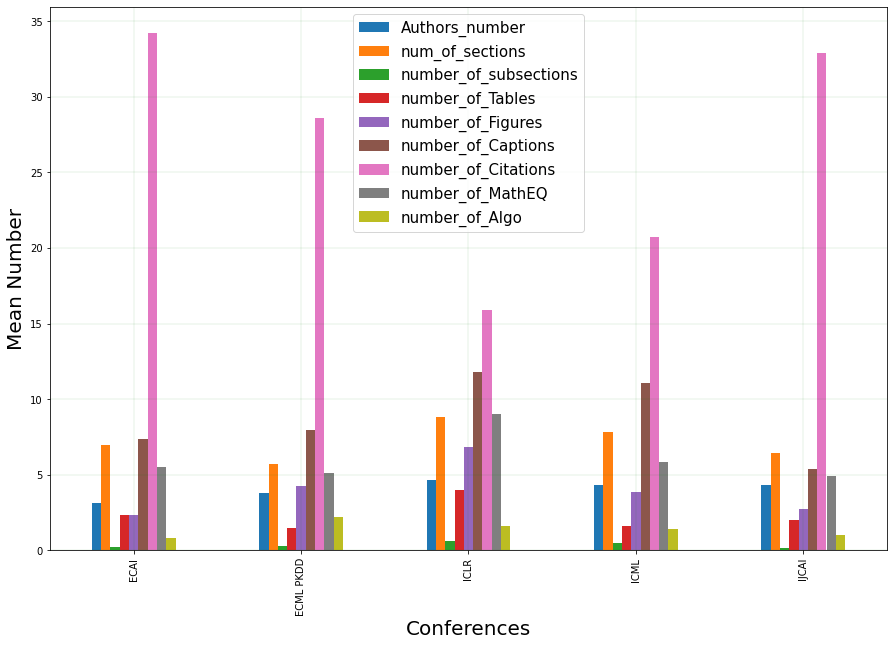

In [157]:
import matplotlib.pyplot as plt
plt.clf()
descriptive_ds[['download_id', 'conference', 'title', 'authors', 'abstract',
       'primary_category', 'uncommented_data', 'Authors_number',
        'sections', 'num_of_sections',
       'subsections', 'number_of_subsections', 'Tables', 'number_of_Tables',
       'Figures', 'number_of_Figures', 'Captions', 'number_of_Captions',
       'Citations', 'number_of_Citations', 'MathEQ', 'number_of_MathEQ',
       'Algo', 'number_of_Algo']].groupby('conference').mean().plot(kind='bar',figsize=(15, 10))
plt.ylabel('Mean Number', fontsize=20)
plt.xlabel('Conferences', fontsize=20)
plt.legend(fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.show()

<Figure size 432x288 with 0 Axes>

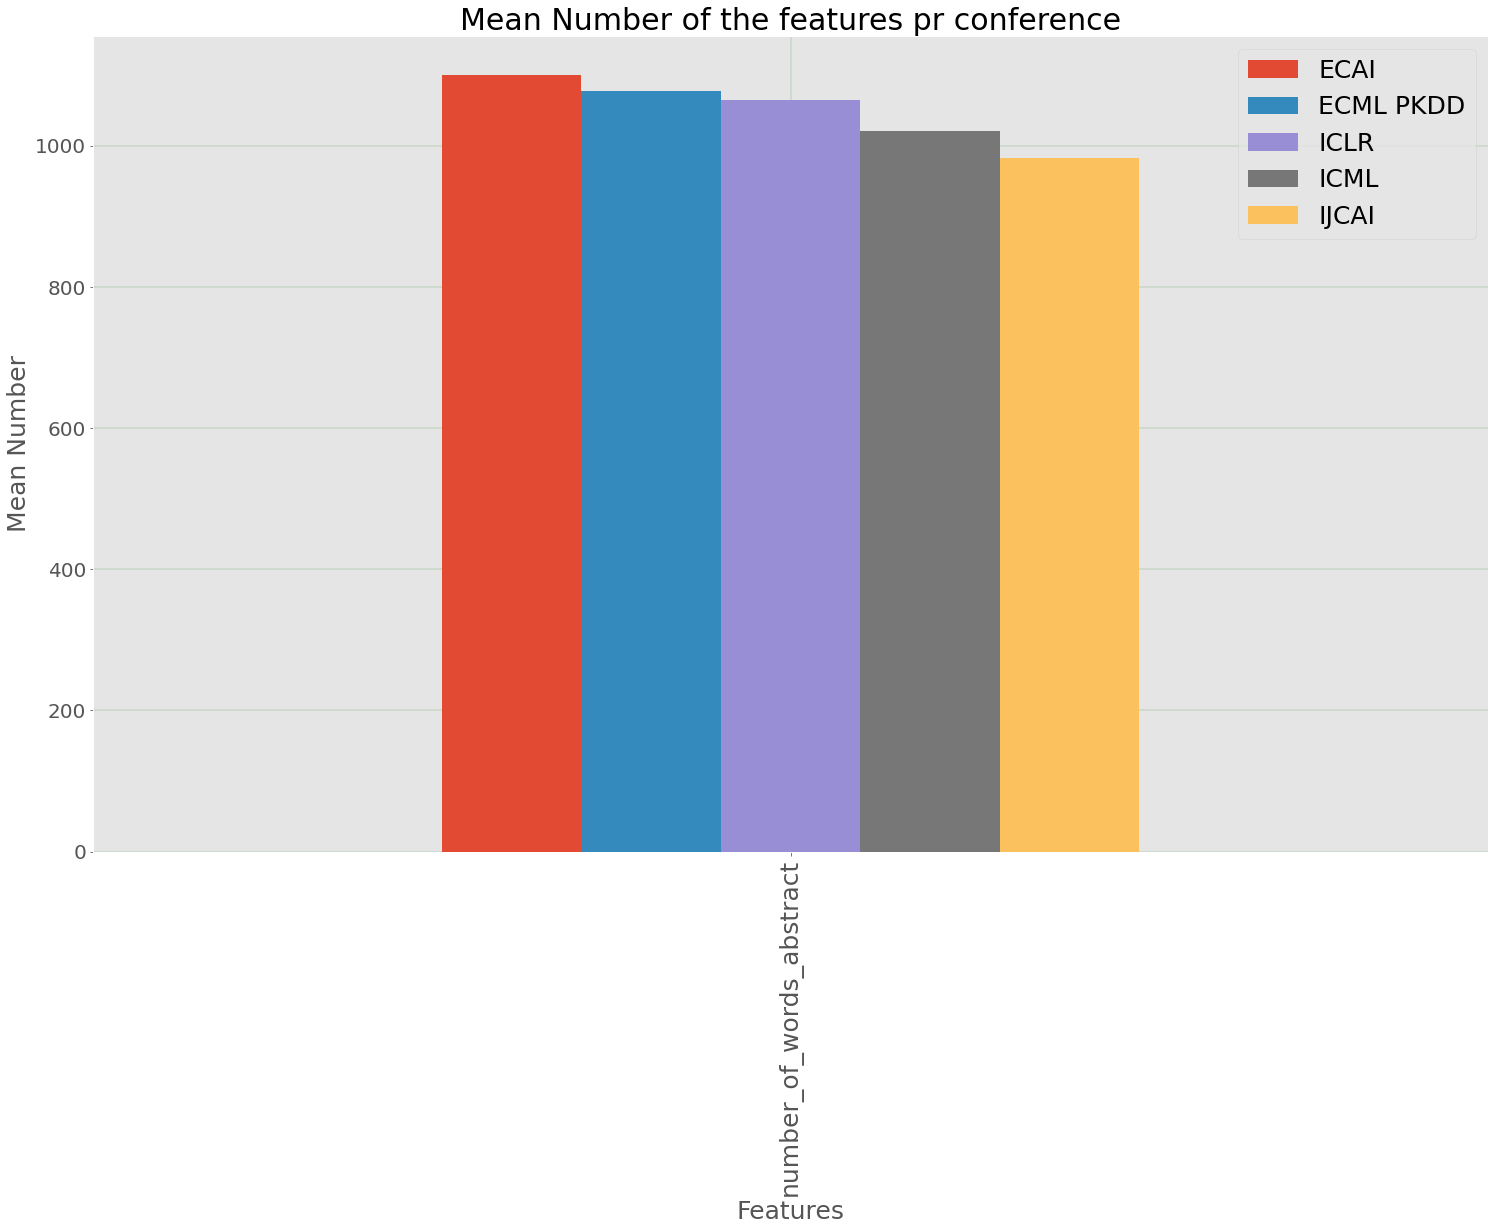

In [330]:
I=descriptive_ds[['download_id', 'conference', 'number_of_words_abstract']].groupby('conference').mean()
J=I.transpose()
plt.clf()
J.plot(kind='bar',figsize=(25, 15))
plt.title('Mean Number of the features pr conference', fontsize=30)
plt.ylabel('Mean Number', fontsize=25)
plt.xlabel('Features', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=20)
plt.grid(color='g', linestyle='-', linewidth=0.2)
plt.show()

<Figure size 432x288 with 0 Axes>

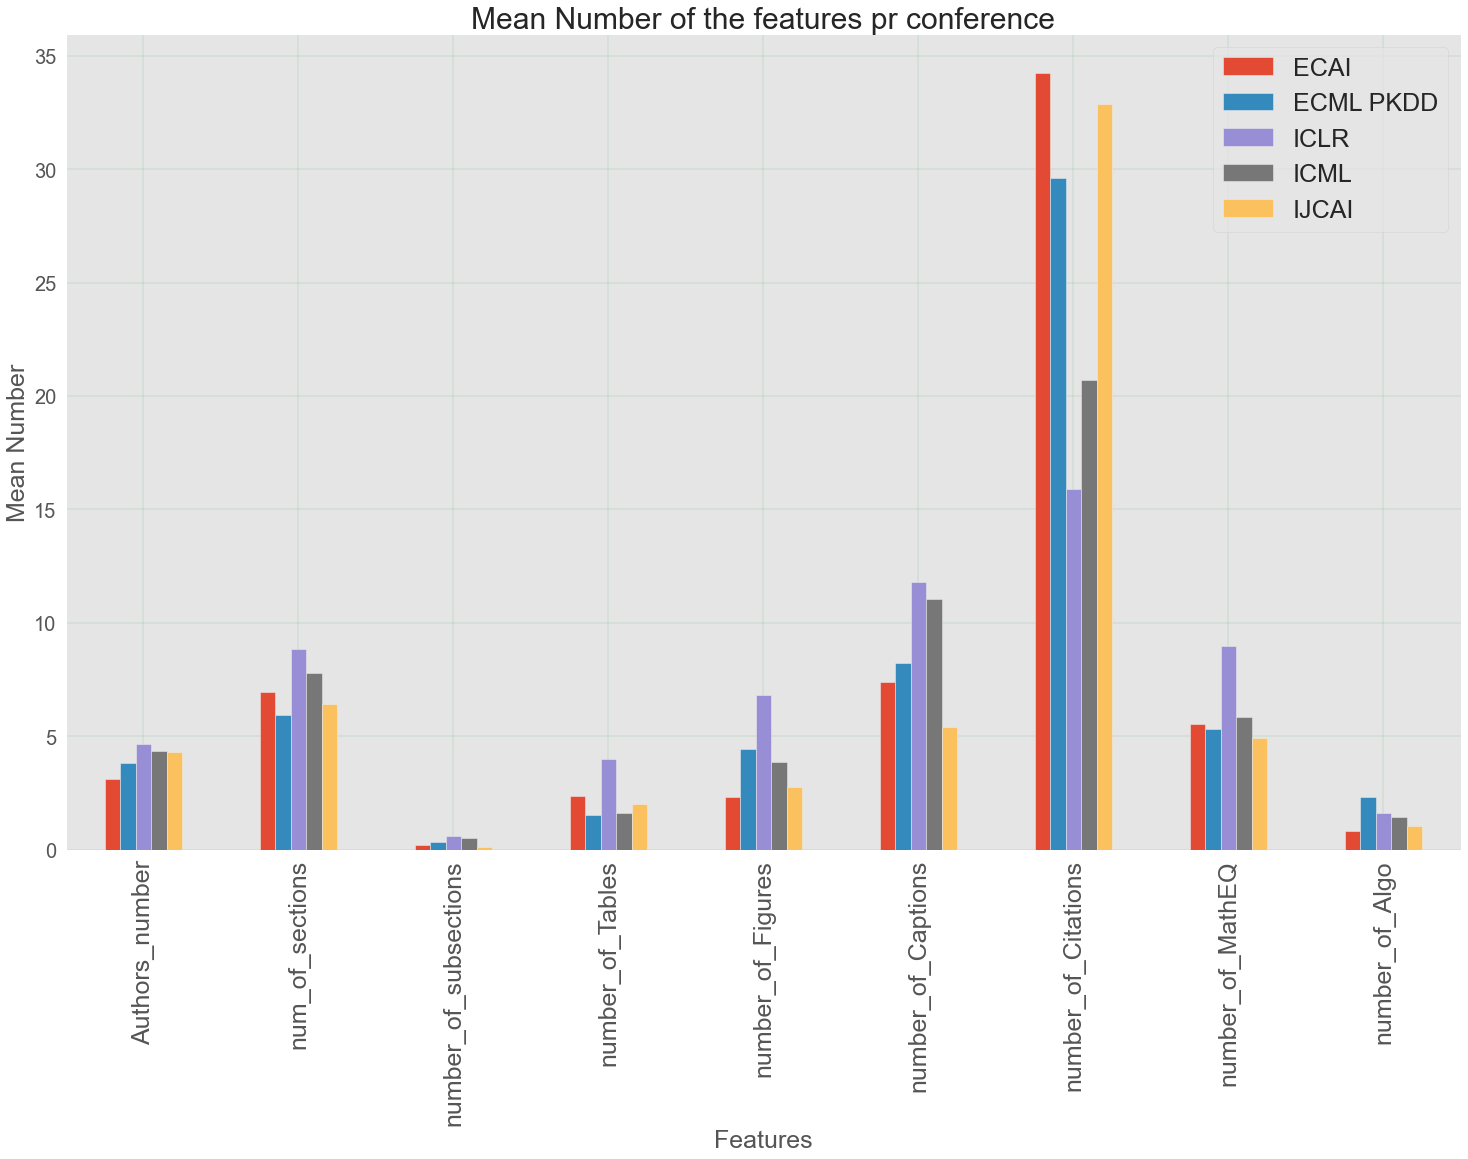

In [693]:
I=descriptive_ds[['download_id', 'conference', 'title', 'authors', 'abstract',
       'primary_category', 'uncommented_data', 'Authors_number',
        'sections', 'num_of_sections',
       'subsections', 'number_of_subsections', 'Tables', 'number_of_Tables',
       'Figures', 'number_of_Figures', 'Captions', 'number_of_Captions',
       'Citations', 'number_of_Citations', 'MathEQ', 'number_of_MathEQ',
       'Algo', 'number_of_Algo']].groupby('conference').mean()
J=I.transpose()
plt.clf()
J.plot(kind='bar',figsize=(25, 15))
plt.title('Mean Number of the features pr conference', fontsize=30)
plt.ylabel('Mean Number', fontsize=25)
plt.xlabel('Features', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=20)
plt.grid(color='g', linestyle='-', linewidth=0.2)
plt.show()

### Scatter plot:
It is a mainstay of statistical visualization. It shows  the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

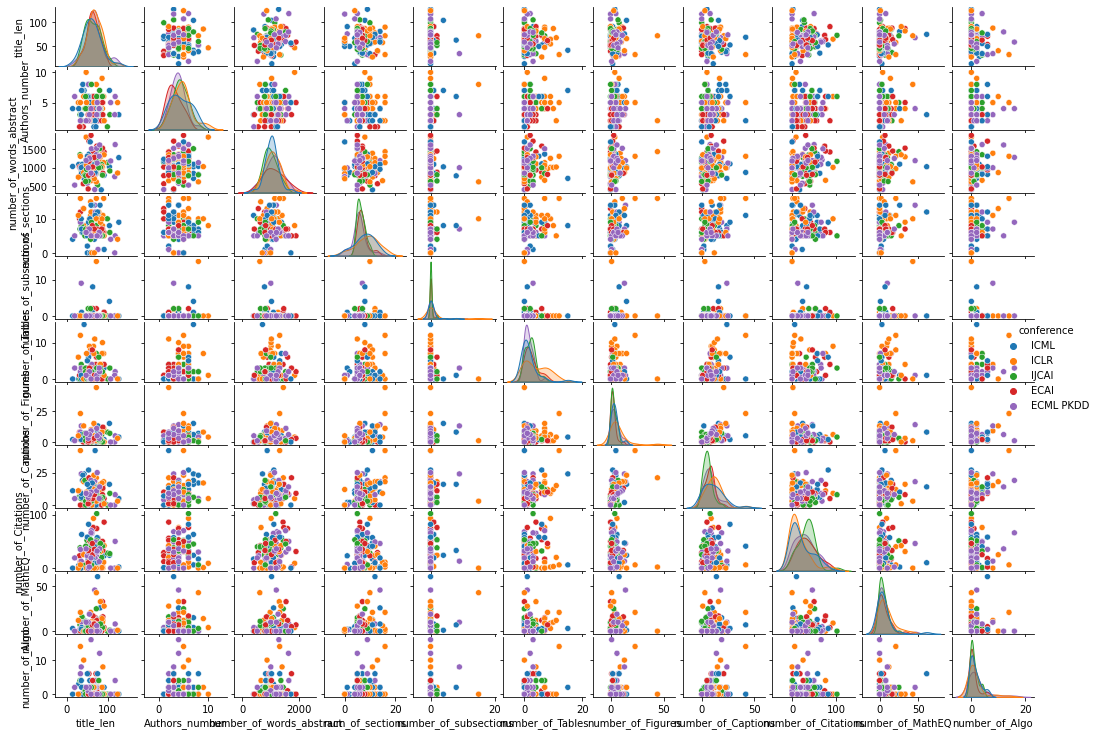

In [226]:
# Plotting Scatter Matrix
# just numeric excluding latitude and city
import seaborn as sns
g=sns.pairplot(data=descriptive_ds, hue="conference",diag_kind="kde");
g.fig.set_size_inches(15,10)


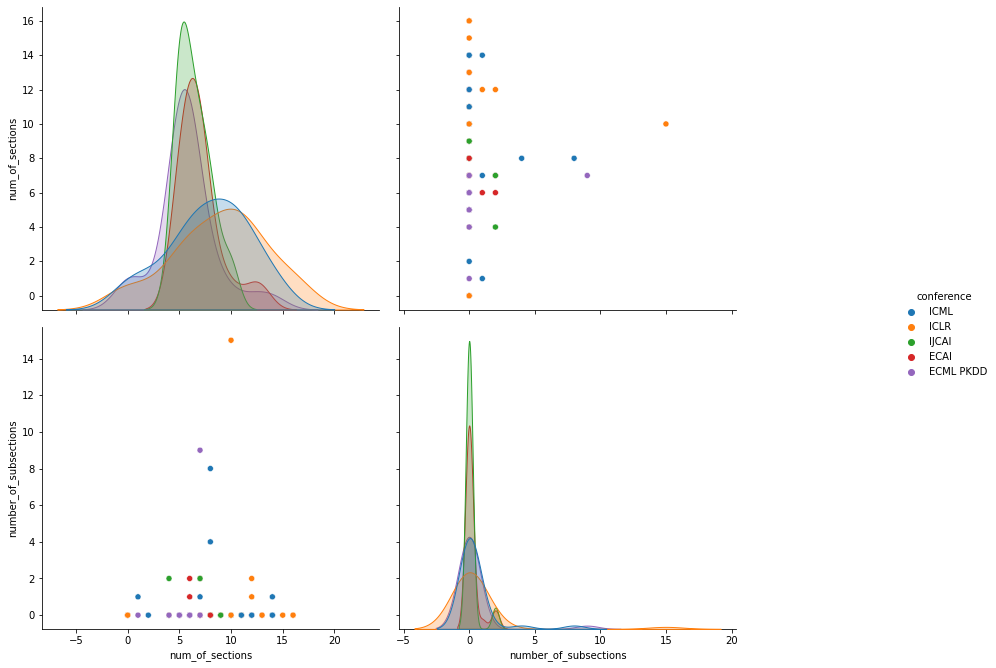

In [67]:
# Plotting Scatter Matrix
# just numeric excluding latitude and city
import seaborn as sns
g=sns.pairplot(data=descriptive_ds[['num_of_sections','number_of_subsections','conference']], hue="conference",diag_kind="kde");
g.fig.set_size_inches(15,10)

#### Corrolation matrix

Text(0.5, 1.0, 'Correlation Matrix Plot')

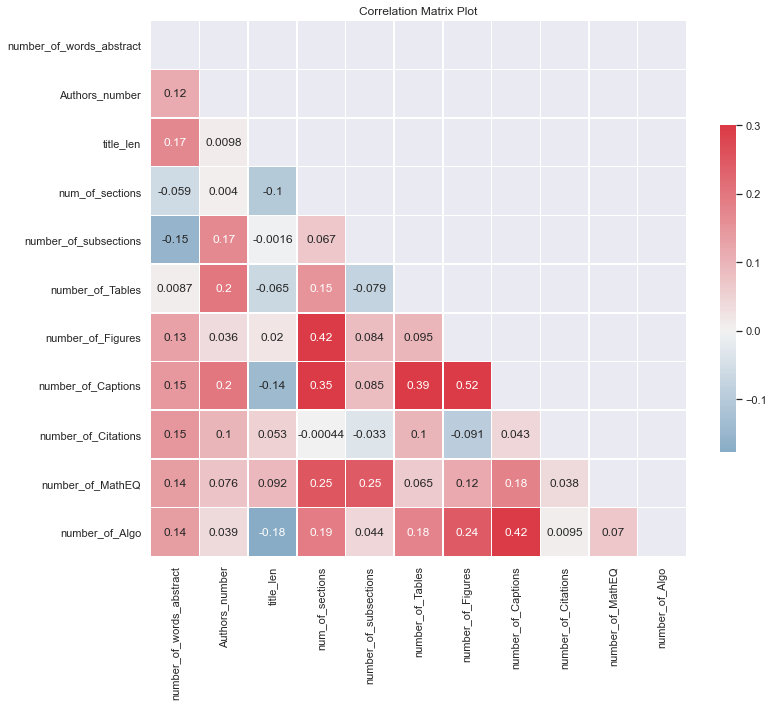

In [55]:
corr = descriptive_ds.iloc[:,:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Plot')

#### Box plots

Notched Boxplot in matplotlib
The notched boxplot allows you to evaluate confidence intervals (by default 95% confidence interval) for the medians of each boxplot.

To create the notch, set notch=True in the plt.boxplot function.

<AxesSubplot:xlabel='number_of_Figures', ylabel='conference'>

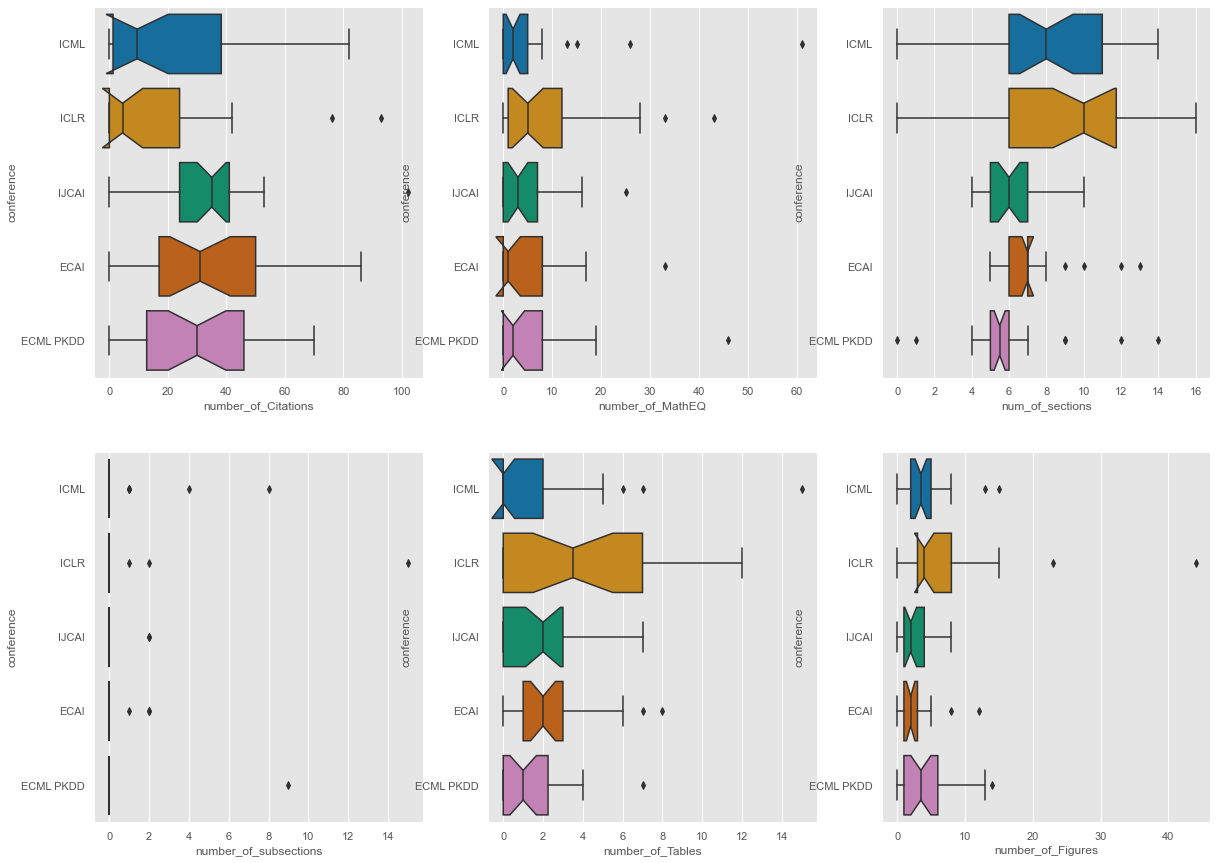

In [925]:
fig, axes = plt.subplots(2,3, figsize=(20, 15))
  
#fig.suptitle('Geeksforgeeks - 2 x 3 axes Box plot with data')

sns.boxplot(ax=axes[0, 0],x='number_of_Citations', y='conference', 
                 data=descriptive_ds, 
                 palette="colorblind",notch=True)
sns.boxplot(ax=axes[0, 1],x='number_of_MathEQ', y='conference', 
                 data=descriptive_ds, 
                 palette="colorblind",notch=True)
sns.boxplot(ax=axes[0, 2],x='num_of_sections', y='conference', 
                 data=descriptive_ds, 
                 palette="colorblind",notch=True)
sns.boxplot(ax=axes[1, 0],x='number_of_subsections', y='conference', 
                 data=descriptive_ds, 
                 palette="colorblind",notch=True)
sns.boxplot(ax=axes[1, 1],x='number_of_Tables', y='conference', 
                 data=descriptive_ds, 
                 palette="colorblind",notch=True)
sns.boxplot(ax=axes[1, 2],x='number_of_Figures', y='conference', 
                 data=descriptive_ds, 
                 palette="colorblind",notch=True)

# 5- Predictive analysis

In [202]:
# Begin by importing all necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [203]:
feature_df=descriptive_ds[[ 'conference', 'number_of_words_abstract',
       'Authors_number', 'title_len',  'num_of_sections',
        'number_of_subsections', 'number_of_Tables',
        'number_of_Figures', 'number_of_Captions',
        'number_of_Citations', 'number_of_MathEQ',
        'number_of_Algo' ]].copy()

In [204]:
feature_df.head(3)

conference  number_of_words_abstract  Authors_number  title_len  \
0       ICML                       795               2         91   
1       ICML                      1090               4         29   
2       ICML                       818               8         52   

   num_of_sections  number_of_subsections  number_of_Tables  \
0                1                      1                 3   
1               11                      0                 0   
2                7                      0                 2   

   number_of_Figures  number_of_Captions  number_of_Citations  \
0                  2                   2                   23   
1                  3                   6                    5   
2                  7                  17                   17   

   number_of_MathEQ  number_of_Algo  
0                 2               2  
1                 0               3  
2                 0               6

In [205]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values=feature_df['conference'].values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
arrr=[]
for i in range(len(integer_encoded)):
    arr=[]
    arr.append(integer_encoded[i])
    arrr.append(arr)
y = np.asarray(arrr)
# split sets
from sklearn.model_selection import train_test_split
X = feature_df.drop('conference',axis=1).values

In [206]:
feature_cols=feature_df.drop('conference',axis=1).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####  SVC and KNN

In [ ]:
# train model
SVC_model = svm.SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)


In [207]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [208]:
# Accuracy score is the simplest way to evaluate
print('The SVC_prediction accuracy_score',accuracy_score(SVC_prediction, y_test))
print('The KNN_prediction accuracy_score',accuracy_score(KNN_prediction, y_test))

The SVC_prediction accuracy_score 0.09302325581395349
The KNN_prediction accuracy_score 0.13953488372093023


In [130]:
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 5  5  0  1  2]
 [ 0  0  0  0  0]
 [ 3  4 11  8  4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.22      0.25      0.24         8
           2       0.09      0.08      0.09        12
           3       0.33      0.38      0.35         8
           4       0.00      0.00      0.00         9

    accuracy                           0.14        43
   macro avg       0.13      0.14      0.14        43
weighted avg       0.13      0.14      0.13        43



#### Decision Tree classifer

In [131]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [132]:
# Model Accuracy, how often is the classifier correct?
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3488372093023256


In [111]:
from sklearn.tree import export_graphviz
from six import StringIO
import graphviz
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['VTC', 'ICML', 'CASCON', 'ICLR', 'IJCAI'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [112]:
graph.write_png('pic.png')

True

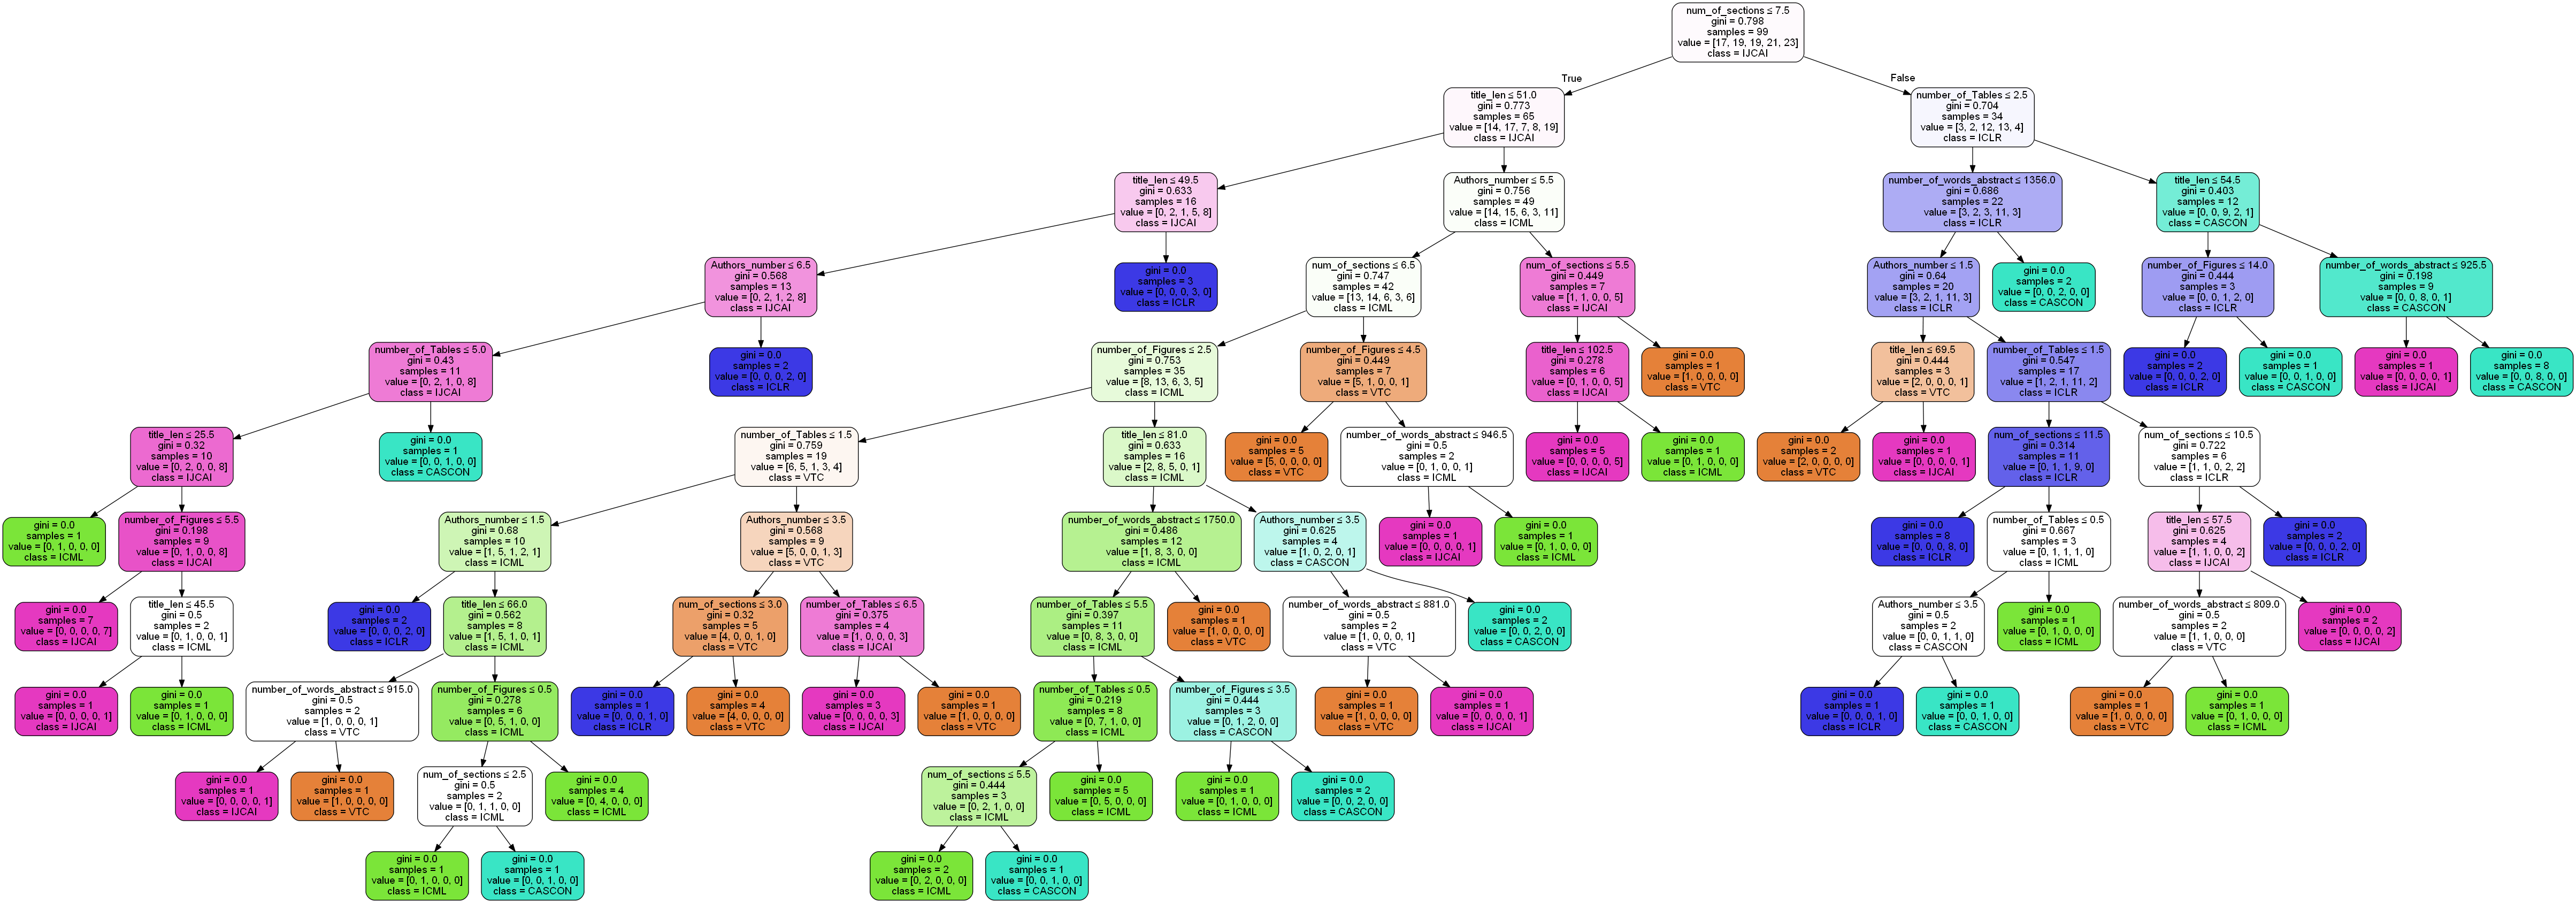

In [113]:
Image(graph.create_png())

# 6- Feature importance based on a Random Forest regressor

In [209]:
# feature scalling
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
# random forest  regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
forest = RandomForestClassifier(max_depth=10, random_state=10, n_estimators=8)
forest.fit(X_train_std,y_train)
type_predictions_train_forest = forest.predict(X_train_std)
type_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,type_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)


C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


#### Accuracy Score

In [190]:
accuracy_score(y_test,type_predictions_test_forest)

0.3953488372093023

In [117]:
print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

mse train 0.58
rmse train 0.76


In [ ]:
# Cross Validation Forest
# Cross validation code
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    forest.set_params(n_estimators=n)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [120]:
# evaluating feature importances
feat_labels = feature_cols
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for feature in range(X_train.shape[1]):
    print(f'{feature} - {feat_labels[indices[feature]]} {importances[indices[feature]]:.5f}')

0 - number_of_words_abstract 0.19102
1 - title_len 0.17888
2 - num_of_sections 0.16893
3 - number_of_Tables 0.16155
4 - Authors_number 0.13468
5 - number_of_Figures 0.13105
6 - number_of_subsections 0.03388


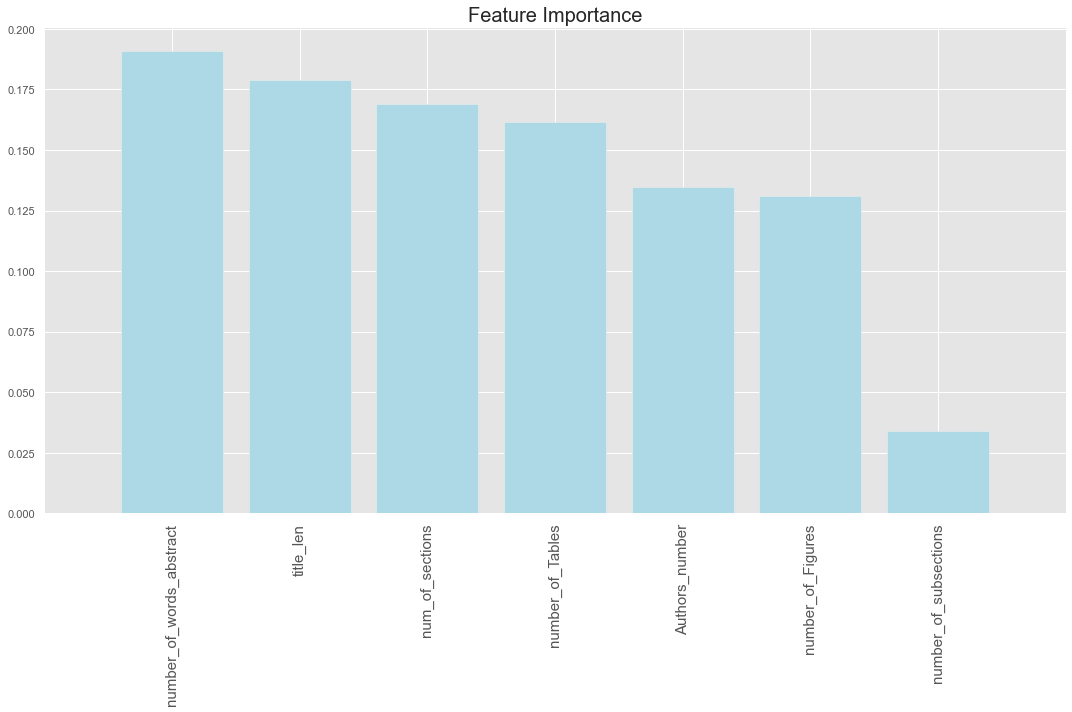

In [121]:
# plotting feature importance
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Feature Importance',fontsize=20)
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90,fontsize=15)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()


# Old code

In [ ]:
"""import glob
import os
path_to_conferences = "./unzipped-papers"
conferences = os.listdir(path_to_conferences)
for conference in conferences:
    print(conference)
    path_to_each_conferences=path_to_conferences+"/"+conference
    papers = os.listdir(path_to_each_conferences)

    for paper in papers:
        print('---------------')
        
        path_to_each_conference_paper=path_to_each_conferences+"/"+paper
        
        
        
        #add a if to test if we have already worked on that paper: e.g if paper is in df["title"].values then pass
    
        for root, dirs, files in os.walk(path_to_each_conference_paper):
            number_of_tex_files=0

            for file in files:
                if file.endswith(".tex"):
                    number_of_tex_files+=1
                    path_to_each_conference_paper_file=os.path.join(root , file).replace("\\","/")
                    print(path_to_each_conference_paper_file)
                    
                    try:
                        data = open(path_to_each_conference_paper_file,encoding="utf8").read()
                    except UnicodeDecodeError:
                        data = open(path_to_each_conference_paper_file).read()
                    # directory already exists
                    pass
                        
                                    
                    if "\documentclass" in data:
                        #print(" The \documentclass detected in ", file )
                        main_tex_file=data
            
            if number_of_tex_files==1:
                print("=============================")
                print(paper)
                print("only 1 tex file detected")
                conferences_df=easy_function(paper,data,conferences_df)
                
            elif number_of_tex_files>1:
                print("more than 1 tex file , Treating now main_tex_file")
                conferences_df=easy_function(paper,main_tex_file,conferences_df)
                #hard_function(main_tex_file)
                       
    
    """

## Test on one file

In [ ]:
data = open('./unzipped-papers/CASCON/1405.0749/simple.tex',encoding="utf8").read()

In [ ]:
data

In [ ]:
# delete commented  data
commented_data=re.findall(r'%(.*?)\n', data, re.S)
uncommented_data=data

for comment in commented_data:
    uncommented_data= uncommented_data.replace('%'+comment+'\n',"")

    
    
    
    # exploring abstarct     
abstract= re.findall(r'\\begin{abstract}(.*?)\\end{abstract}', uncommented_data, re.S)
print(abstract)

if (abstract!=[]):
    cleanabstract= abstract[0].replace('\n',"")
 
    number_of_words_abstract= len(cleanabstract.split())
    conferences_df.loc[conferences_df['download']==float(paper),'Abstarct'] = cleanabstract
    conferences_df.loc[conferences_df['download']==float(paper),'number_of_words_abstract'] = number_of_words_abstract
    
    #Sections
number_of_sections=len(re.findall(r'\\section{.*?}', uncommented_data, re.S))
conferences_df.loc[conferences_df['download']==float(paper),'number_of_sections'] = number_of_sections
print(number_of_sections)

#SubSections
number_of_subsections=len(re.findall(r'..\\subsection{.*?}', uncommented_data, re.S)) 
conferences_df.loc[conferences_df['download']==float(paper),'number_of_subsections']= number_of_subsections
print(number_of_subsections)

 #Tables
number_of_Tables=len(re.findall(r'begin{table}', uncommented_data, re.S))
conferences_df.loc[conferences_df['download']==float(paper),'number_of_Tables']= number_of_Tables
print(number_of_Tables)

#Figures
number_of_Figures=len(re.findall(r'\\begin\{figure}', uncommented_data, re.S))
conferences_df.loc[conferences_df['download']==float(paper),'number_of_Figures'] = number_of_Figures
print(number_of_Figures)

In [ ]:
#References
number_ref=len(re.findall(r'\\ref{.*?} ', uncommented_data, re.S))
number_ref

In [ ]:
re.findall(r'..ref{.*?}' , uncommented_data, re.S)

In [ ]:
uncommented_data